# Анализ бизнес-показателей Procrastinate Pro+

Несмотря на огромные вложения в рекламу, развлекательное приложение Procrastinate Pro+ последние несколько месяцев терпит убытки. Необходимо разобраться в причинах и помочь компании выйти в плюс.
Даны данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года, которые включают:
* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.

**Цель исследования:**

1) Выяснить откуда приходят пользователи и какими устройствами они пользуются;

2) Узнасть сколько стоит привлечение пользователей из различных рекламных каналов;

3) Определить сколько денег приносит каждый клиент;

4) Определить когда расходы на привлечение клиента окупаются;

5) Найти факторы, которые мешают привлечению клиентов.


**Описание данных:**

Дано три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

**1)  Структура visits_info_short.csv:**
* User Id — уникальный идентификатор пользователя,
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии.

**2) Структура orders_info_short.csv:**
* User Id — уникальный идентификатор пользователя,
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.

**3) Структура costs_info_short.csv:**
* dt — дата проведения рекламной кампании,
* Channel — идентификатор рекламного источника,
* costs — расходы на эту кампанию.

**Проект состоит из 6 частей:**

1) Загрузка данных, их обзор, предобработка и подготовка к анализу;

2) Задача функции для расчёта и анализа показателей LTV, ROI, удержания и конверсии и постороения графиков по эти показателям;

3) Проведем исследовательский анализ данных: проанализируем пользователей по когортам - по странам, по используемым устройствам и по источникам привличения;

4) Проанализируем затраты на маркетинг и узнаем стоимость показателя САС и его динамики;

5) Оценим окупаемость рекламы: проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI. Так же построим и проведем анализ по таким же графикам по вышеперечиленным когортам;

6) Общий вывод.

### Загрузите данные и подготовьте их к анализу

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучим данные и выполним предобработку. Проверим данные на наличие пропусков и дубликатов. Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям.(Обратим внимание на столбцы с датой и временем.)

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
visits=pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
orders=pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
costs=pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

In [ ]:
visits

User Id         Region   Device         Channel  \
0       981449118918  United States   iPhone         organic   
1       278965908054  United States   iPhone         organic   
2       590706206550  United States      Mac         organic   
3       326433527971  United States  Android          TipTop   
4       349773784594  United States      Mac         organic   
...              ...            ...      ...             ...   
309896  329994900775             UK       PC         LeapBob   
309897  334903592310         France       PC  lambdaMediaAds   
309898  540102010126        Germany       PC         organic   
309899  308736936846        Germany      Mac         organic   
309900  109329042535        Germany       PC  lambdaMediaAds   

              Session Start          Session End  
0       2019-05-01 02:36:01  2019-05-01 02:45:01  
1       2019-05-01 04:46:31  2019-05-01 04:47:35  
2       2019-05-01 14:09:25  2019-05-01 15:32:08  
3       2019-05-01 00:29:59  2019-05-01 00:54:25  
4       2019-05-01 03:33:35  2019-05-01 03:57:40  
...                     ...                  ...  
309896  2019-10-31 13:28:12  2019-10-31 14:39:29  
309897  2019-10-31 22:14:52  2019-10-31 22:39:36  
309898  2019-10-31 01:40:48  2019-10-31 01:41:31  
309899  2019-10-31 07:37:34  2019-10-31 07:37:55  
309900  2019-10-31 14:17:43  2019-10-31 15:17:04  

[309901 rows x 6 columns]

In [ ]:
orders

User Id             Event Dt  Revenue
0      188246423999  2019-05-01 23:09:52     4.99
1      174361394180  2019-05-01 12:24:04     4.99
2      529610067795  2019-05-01 11:34:04     4.99
3      319939546352  2019-05-01 15:34:40     4.99
4      366000285810  2019-05-01 13:59:51     4.99
...             ...                  ...      ...
40207  651604369137  2019-10-31 16:19:07     4.99
40208  275341387049  2019-10-31 01:17:17     4.99
40209  374656616484  2019-10-31 06:17:29     4.99
40210  168548862926  2019-10-31 22:46:19     4.99
40211  329994900775  2019-10-31 13:29:06     4.99

[40212 rows x 3 columns]

In [ ]:
costs

dt         Channel  costs
0     2019-05-01        FaceBoom  113.3
1     2019-05-02        FaceBoom   78.1
2     2019-05-03        FaceBoom   85.8
3     2019-05-04        FaceBoom  136.4
4     2019-05-05        FaceBoom  122.1
...          ...             ...    ...
1795  2019-10-23  lambdaMediaAds    4.0
1796  2019-10-24  lambdaMediaAds    6.4
1797  2019-10-25  lambdaMediaAds    8.8
1798  2019-10-26  lambdaMediaAds    8.8
1799  2019-10-27  lambdaMediaAds   12.0

[1800 rows x 3 columns]

In [ ]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


В таблице visits пропусков не обнаружено

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


В таблице orders пропусков не обнаружено

In [ ]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В таблице costs пропусков не обнаружено

Во все таблицах нет пропусков

Далее рассмотрим дубликаты:

In [ ]:
visits.duplicated().sum()

0

In [ ]:
visits[visits.duplicated ()]

Empty DataFrame
Columns: [User Id, Region, Device, Channel, Session Start, Session End]
Index: []

Дубликатов в таблице visits не обнаруженно

In [ ]:
orders.duplicated().sum()

0

In [ ]:
orders[orders.duplicated ()]

Empty DataFrame
Columns: [User Id, Event Dt, Revenue]
Index: []

Дубликатов в таблице orders не обнаруженно

In [ ]:
costs.duplicated().sum()

0

In [ ]:
costs[costs.duplicated ()]

Empty DataFrame
Columns: [dt, Channel, costs]
Index: []

Дубликатов в таблице costs не обнаруженно

Во все таблицах нет дубликатов

Проверим тип данных в таблице на соотвествие данным и исправим если есть не соотвествие

Сначала обратим внимание на навзание колонок - они написанны не по правилам - исправим это

In [ ]:
visits.head(1)

User Id         Region  Device  Channel        Session Start  \
0  981449118918  United States  iPhone  organic  2019-05-01 02:36:01   

           Session End  
0  2019-05-01 02:45:01

In [ ]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Как минимум исправим неподобающие названия колонок

In [ ]:
visits.head(1)

User Id         Region  Device  Channel        Session Start  \
0  981449118918  United States  iPhone  organic  2019-05-01 02:36:01   

           Session End  
0  2019-05-01 02:45:01

In [ ]:
visits.columns = visits.columns.str.lower()
st=[]
for i in visits.columns:
    ite=i.replace(" ","_")
    st.append(ite)
visits.columns=st
print(visits.columns)
print()
visits.head(1)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')



user_id         region  device  channel        session_start  \
0  981449118918  United States  iPhone  organic  2019-05-01 02:36:01   

           session_end  
0  2019-05-01 02:45:01

In [ ]:
orders.head(1)

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99

In [ ]:
orders.columns = orders.columns.str.lower()
st=[]
for i in orders.columns:
    ite=i.replace(" ","_")
    st.append(ite)
orders.columns=st
orders.columns
print(orders.columns)
print()
orders.head(1)

Index(['user_id', 'event_dt', 'revenue'], dtype='object')



user_id             event_dt  revenue
0  188246423999  2019-05-01 23:09:52     4.99

In [ ]:
costs.head(1)

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3

In [ ]:
costs.columns = costs.columns.str.lower()
st=[]
for i in costs.columns:
    ite=i.replace(" ","_")
    st.append(ite)
costs.columns=st
costs.columns
costs.dt=costs.dt
print(costs.columns)
print()
costs.head(1)

Index(['dt', 'channel', 'costs'], dtype='object')



dt   channel  costs
0  2019-05-01  FaceBoom  113.3

Теперь исправим сами данные в колонках

In [ ]:
visits.info()
print()
visits.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB



user_id         region  device  channel        session_start  \
0  981449118918  United States  iPhone  organic  2019-05-01 02:36:01   

           session_end  
0  2019-05-01 02:45:01

In [ ]:
visits['session_start']=pd.to_datetime(visits['session_start'])
visits['session_end']=pd.to_datetime(visits['session_end'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [ ]:
visits

user_id         region   device         channel  \
0       981449118918  United States   iPhone         organic   
1       278965908054  United States   iPhone         organic   
2       590706206550  United States      Mac         organic   
3       326433527971  United States  Android          TipTop   
4       349773784594  United States      Mac         organic   
...              ...            ...      ...             ...   
309896  329994900775             UK       PC         LeapBob   
309897  334903592310         France       PC  lambdaMediaAds   
309898  540102010126        Germany       PC         organic   
309899  308736936846        Germany      Mac         organic   
309900  109329042535        Germany       PC  lambdaMediaAds   

             session_start         session_end  
0      2019-05-01 02:36:01 2019-05-01 02:45:01  
1      2019-05-01 04:46:31 2019-05-01 04:47:35  
2      2019-05-01 14:09:25 2019-05-01 15:32:08  
3      2019-05-01 00:29:59 2019-05-01 00:54:25  
4      2019-05-01 03:33:35 2019-05-01 03:57:40  
...                    ...                 ...  
309896 2019-10-31 13:28:12 2019-10-31 14:39:29  
309897 2019-10-31 22:14:52 2019-10-31 22:39:36  
309898 2019-10-31 01:40:48 2019-10-31 01:41:31  
309899 2019-10-31 07:37:34 2019-10-31 07:37:55  
309900 2019-10-31 14:17:43 2019-10-31 15:17:04  

[309901 rows x 6 columns]

In [ ]:
orders.info()
print()
orders.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB



user_id             event_dt  revenue
0  188246423999  2019-05-01 23:09:52     4.99

In [ ]:
orders['event_dt']=pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [ ]:
costs.info()
print()
costs.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB



dt   channel  costs
0  2019-05-01  FaceBoom  113.3

In [ ]:
costs['dt']=pd.to_datetime(costs['dt'])
#costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
 3   month    1800 non-null   int64         
 4   week     1800 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 65.2+ KB


In [ ]:
costs.dtypes[costs.dtypes.values==np.dtype('<M8[ns]')].index

Index(['dt'], dtype='object')

Проверим временной интервал на соответствие условию проекта:

In [ ]:
def get_variable_name(variable):
    for name in globals():
        if str(globals()[name]) == str(variable):
            return name
    return None

In [ ]:
a=[]
а_print=''
b=pd.DataFrame()
c_print=''
d=pd.DataFrame()
head_table=visits,costs,orders
for x in head_table:
  a.append(get_variable_name(x))
  а_print=а_print+f'{get_variable_name(x)}, '
а_print=а_print[:-2]
print(f'{a}')
print(f'Имя таблиц: {а_print}')
for y in a:
  b=pd.DataFrame({'col':globals()[y].columns})
  b.name=y
  b['tables']=b.name
  d=pd.concat([d,b])
d=d[['tables','col']].reset_index(drop=True)
for i in d.index:
  d.loc[i,'dtype']=globals()[d.loc[i,'tables']][d.loc[i,'col']].dtypes
print()
print('Все колонки всех таблиц без дубликатов и тип данных в них:')
display(d)
c=d.loc[d['dtype']=='datetime64[ns]',:]
for x in c.col:
    c_print=c_print+f'{x}, '
c_print=c_print[:-2]
print()
display(c)
print(f'Все колонки всех таблиц без дубликатов и тип которых - datetime64[ns] - датавременной тип: {c_print}')

['visits', 'costs', 'orders']
Имя таблиц: visits, costs, orders

Все колонки всех таблиц без дубликатов и тип данных в них:


tables            col           dtype
0   visits        user_id           int64
1   visits         region          object
2   visits         device          object
3   visits        channel          object
4   visits  session_start  datetime64[ns]
5   visits    session_end  datetime64[ns]
6    costs             dt  datetime64[ns]
7    costs        channel          object
8    costs          costs         float64
9    costs          month           int64
10   costs           week          UInt32
11  orders        user_id           int64
12  orders       event_dt  datetime64[ns]
13  orders        revenue         float64

tables            col           dtype
4   visits  session_start  datetime64[ns]
5   visits    session_end  datetime64[ns]
6    costs             dt  datetime64[ns]
12  orders       event_dt  datetime64[ns]

Все колонки всех таблиц без дубликатов и тип которых - datetime64[ns] - датавременной тип: session_start, session_end, dt, event_dt


In [ ]:
for i in c.index:
  print(f"В таблице <{c.loc[i,'tables']}> столбца ['{c.loc[i,'col']}'] приведены даты  c {globals()[c.loc[i,'tables']][c.loc[i,'col']].min().date()} по {globals()[c.loc[i,'tables']][c.loc[i,'col']].max().date()} ")

В таблице <visits> столбца ['session_start'] приведены даты  c 2019-05-01 по 2019-10-31 
В таблице <visits> столбца ['session_end'] приведены даты  c 2019-05-01 по 2019-11-01 
В таблице <costs> столбца ['dt'] приведены даты  c 2019-05-01 по 2019-10-27 
В таблице <orders> столбца ['event_dt'] приведены даты  c 2019-05-01 по 2019-10-31 


In [ ]:
e=d.copy()

In [ ]:
for i in e.index:
  if e.loc[i,'dtype'] !='datetime64[ns]':
    print(i)

0
1
2
3
7
8
9
10
11
13


In [ ]:
e_number=e[(e['dtype'] != 'object') * \
  (e['dtype'] != 'datetime64[ns]')]
for i in e_number.index:
  e_number.loc[i,globals()[e_number.loc[i,'tables']][e_number.loc[i,'col']].describe().index]=globals()[e_number.loc[i,'tables']][e_number.loc[i,'col']].describe().values
e_number=e_number.T
e_number.columns=[e_number.loc['tables',:],e_number.loc['col',:]]
e_number.drop(index=['tables','col'])

tables              visits     costs                                  orders  \
col                user_id     costs     month      week             user_id   
dtype                int64   float64     int64    UInt32               int64   
count          309,901.000 1,800.000 1,800.000 1,800.000          40,212.000   
mean   499,766,449,382.703    58.610     7.444    30.639 499,029,531,203.230   
std    288,789,916,887.831   107.740     1.688     7.426 286,093,675,967.167   
min            599,326.000     0.800     5.000    18.000         599,326.000   
25%    249,369,122,776.000     6.495     6.000    24.000 251,132,440,436.750   
50%    498,990,589,687.000    12.285     7.000    31.000 498,283,972,665.000   
75%    749,521,111,616.000    33.600     9.000    37.000 743,332,711,780.000   
max    999,999,563,947.000   630.000    10.000    43.000 999,895,427,370.000   

tables             
col       revenue  
dtype     float64  
count  40,212.000  
mean        5.371  
std         3.454  
min         4.990  
25%         4.990  
50%         4.990  
75%         4.990  
max        49.990

In [ ]:
e_number

tables              visits     costs                                  orders  \
col                user_id     costs     month      week             user_id   
tables              visits     costs     costs     costs              orders   
col                user_id     costs     month      week             user_id   
dtype                int64   float64     int64    UInt32               int64   
count          309,901.000 1,800.000 1,800.000 1,800.000          40,212.000   
mean   499,766,449,382.703    58.610     7.444    30.639 499,029,531,203.230   
std    288,789,916,887.831   107.740     1.688     7.426 286,093,675,967.167   
min            599,326.000     0.800     5.000    18.000         599,326.000   
25%    249,369,122,776.000     6.495     6.000    24.000 251,132,440,436.750   
50%    498,990,589,687.000    12.285     7.000    31.000 498,283,972,665.000   
75%    749,521,111,616.000    33.600     9.000    37.000 743,332,711,780.000   
max    999,999,563,947.000   630.000    10.000    43.000 999,895,427,370.000   

tables             
col       revenue  
tables     orders  
col       revenue  
dtype     float64  
count  40,212.000  
mean        5.371  
std         3.454  
min         4.990  
25%         4.990  
50%         4.990  
75%         4.990  
max        49.990

In [ ]:
e_number.loc[:,e_number.loc['col',:]!='user_id'].drop(index=['tables','col'])

tables     costs                         orders
col        costs     month      week    revenue
dtype    float64     int64    UInt32    float64
count  1,800.000 1,800.000 1,800.000 40,212.000
mean      58.610     7.444    30.639      5.371
std      107.740     1.688     7.426      3.454
min        0.800     5.000    18.000      4.990
25%        6.495     6.000    24.000      4.990
50%       12.285     7.000    31.000      4.990
75%       33.600     9.000    37.000      4.990
max      630.000    10.000    43.000     49.990

In [ ]:
e_str=e[(e['dtype'] == 'object') + \
  (e['dtype'] == 'datetime64[ns]')]
for i in e_str.index:
  e_str.loc[i,globals()[e_str.loc[i,'tables']][e_str.loc[i,'col']].describe().index]=globals()[e_str.loc[i,'tables']][e_str.loc[i,'col']].describe().values
e_str=e_str.T.dropna()
e_str.columns=[e_str.loc['tables',:],e_str.loc['col',:]]
e_str=e_str.T.drop(columns=['tables','col'])
e_str

dtype       count      unique  \
tables col                                                     
visits region                 object 309,901.000       4.000   
       device                 object 309,901.000       4.000   
       channel                object 309,901.000      11.000   
       session_start  datetime64[ns] 309,901.000 306,813.000   
       session_end    datetime64[ns] 309,901.000 306,793.000   
costs  dt             datetime64[ns]   1,800.000     180.000   
       channel                object   1,800.000      10.000   
orders event_dt       datetime64[ns]  40,212.000  40,163.000   

                                      top        freq  
tables col                                             
visits region               United States 207,327.000  
       device                      iPhone 112,603.000  
       channel                    organic 107,760.000  
       session_start  2019-06-27 14:56:41       3.000  
       session_end    2019-07-16 02:23:30       3.000  
costs  dt             2019-05-01 00:00:00      10.000  
       channel                   FaceBoom     180.000  
orders event_dt       2019-10-26 06:49:22       2.000

**Вывод:**

**Подключил все основные и необходимые библиотеки. Выгрузил все данные и дал им названия visits – визиты, orders -  заказы, costs – заказы. Далее изучил данные: увидел, что названия колонок написаны не по стилю: с большой буквы вообще с пробелами – исправил это недоразумение – привел все к нижнему регистру и заменил пробелы на нижний прочерк. Далее сделал проверку на пропуски и дубликаты – все три таблицы проверку прошли успешно – не было обнаружено ни дубликатов, ни пропусков.
Изучив типы данных начальных таблиц, увидел, что характеристики даты и времени стоят с типом данных object – исправил это на datetime и date.**

# ===============================================================

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функция для создания профилей пользователей - (get_profiles):

In [ ]:
events =[]

In [ ]:
def get_profiles(sessions, orders, ad_costs, events = [], event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Функция для подсчёта Retention Rate - (get_retention):

In [ ]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для подсчёта конверсии - (get_conversion):

In [ ]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для подсчёта LTV - (get_ltv):

In [ ]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC,
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функция для сглаживания данных - (filter_data):

In [ ]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

#### Функция для построения графика Retention Rate - (plot_retention):

In [ ]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

#### Функция для построения графика конверсии - (plot_conversion):

In [ ]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Функция для визуализации LTV и ROI - (plot_ltv_roi):

In [ ]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(30, 20),linewidth = 20)

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1,linewidth = 3)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2,linewidth = 3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3,linewidth = 3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4,linewidth = 3)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5,linewidth = 3)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Добавил все 8 фунцкций**

# ===============================================================

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Составим профили пользователей и определим минимальную и максимальную даты привлечения пользователей.

In [ ]:
events = []

In [ ]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [ ]:
profiles= get_profiles(visits, orders, costs)
profiles

user_id            first_ts       channel  device         region  \
0             599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1            4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
2            6085896 2019-10-01 09:58:33       organic  iPhone         France   
3           22593348 2019-08-22 21:35:48    AdNonSense      PC        Germany   
4           31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
...              ...                 ...           ...     ...            ...   
150003  999956196527 2019-09-28 08:33:02        TipTop  iPhone  United States   
150004  999975439887 2019-10-21 00:35:17       organic      PC             UK   
150005  999976332130 2019-07-23 02:57:06        TipTop  iPhone  United States   
150006  999979924135 2019-09-28 21:28:09  MediaTornado      PC  United States   
150007  999999563947 2019-10-18 19:57:25       organic  iPhone  United States   

                dt               month  payer  acquisition_cost  
0       2019-05-07 2019-05-07 20:58:57   True          1.088172  
1       2019-07-09 2019-07-09 12:46:07  False          1.107237  
2       2019-10-01 2019-10-01 09:58:33  False          0.000000  
3       2019-08-22 2019-08-22 21:35:48  False          0.988235  
4       2019-10-02 2019-10-02 00:07:44  False          0.230769  
...            ...                 ...    ...               ...  
150003  2019-09-28 2019-09-28 08:33:02  False          3.500000  
150004  2019-10-21 2019-10-21 00:35:17  False          0.000000  
150005  2019-07-23 2019-07-23 02:57:06  False          2.600000  
150006  2019-09-28 2019-09-28 21:28:09  False          0.205714  
150007  2019-10-18 2019-10-18 19:57:25  False          0.000000  

[150008 rows x 9 columns]

In [ ]:
min_date=profiles['dt'].min()
max_date=profiles['dt'].max()
print('Минимальная дата:',min_date)
print()
print('Максимальная дата:',max_date)

Минимальная дата: 2019-05-01

Максимальная дата: 2019-10-27


**Вывод:**

**Сначала определил таблицу с профилями с помощью функции get_profiles. C помощью функций min и max определил минимальную и максимальную дату в столбце dt.**
****

# ---------------------------------------------------------------------------------------------------------------

#### Выясним из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей, а также построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [ ]:
profiles['region'].unique()

array(['United States', 'France', 'Germany', 'UK'], dtype=object)

In [ ]:
profiles_country_true=profiles.query('payer==True').pivot_table(index='region',values='user_id',aggfunc='nunique').sort_values(by='region')
profiles_country_false=profiles.query('payer==False').pivot_table(index='region',values='user_id',aggfunc='nunique').sort_values(by='region')
#profiles_country.columns = ['payer', 'region', 'quantity']
#profiles_country.rename(columns={'region':'quantity'}, inplace = True )
display(profiles_country_true)
print()
display(profiles_country_false)


user_id
region                
France             663
Germany            616
UK                 700
United States     6902

user_id
region                
France           16787
Germany          14365
UK               16875
United States    93100

In [ ]:
profiles_country=profiles_country_true.merge(profiles_country_false, on='region')

profiles_country.columns = ['payer_quantity', 'not_payer_quantity']
profiles_country['total_quantity']=profiles_country['payer_quantity']+profiles_country['not_payer_quantity']
profiles_country['payer_percentage']=round(profiles_country['payer_quantity']/profiles_country['total_quantity']*100,2)
profiles_country['user_payer_rate']=round(profiles_country['payer_quantity']/(profiles_country['payer_quantity'].sum())*100,2)
profiles_country['not_payer_percentage']=round(profiles_country['not_payer_quantity']/profiles_country['total_quantity']*100,2)
profiles_country['user_not_payer_rate']=round(profiles_country['not_payer_quantity']/(profiles_country['not_payer_quantity'].sum())*100,2)
display(profiles_country)
print()
profiles_country.sort_values(by='payer_percentage',ascending=False).head(1)

payer_quantity  not_payer_quantity  total_quantity  \
region                                                              
France                    663               16787           17450   
Germany                   616               14365           14981   
UK                        700               16875           17575   
United States            6902               93100          100002   

               payer_percentage  user_payer_rate  not_payer_percentage  \
region                                                                   
France                     3.80             7.47                 96.20   
Germany                    4.11             6.94                 95.89   
UK                         3.98             7.88                 96.02   
United States              6.90            77.72                 93.10   

               user_not_payer_rate  
region                              
France                       11.89  
Germany                      10.18  
UK                           11.96  
United States                65.97

payer_quantity  not_payer_quantity  total_quantity  \
region                                                              
United States            6902               93100          100002   

               payer_percentage  user_payer_rate  not_payer_percentage  \
region                                                                   
United States               6.9            77.72                  93.1   

               user_not_payer_rate  
region                              
United States                65.97

Значит в США самый большой процент платящих клиентов из 4 стран

In [ ]:
profiles.pivot_table(index='region',values='user_id',aggfunc='nunique').sort_values(by='region')

user_id
region                
France           17450
Germany          14981
UK               17575
United States   100002

((ПРОВЕРКА для profiles_country['total_quantity']))

Всего аналитика по 4 странам

In [ ]:
profiles

user_id            first_ts       channel  device         region  \
0             599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1            4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
2            6085896 2019-10-01 09:58:33       organic  iPhone         France   
3           22593348 2019-08-22 21:35:48    AdNonSense      PC        Germany   
4           31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
...              ...                 ...           ...     ...            ...   
150003  999956196527 2019-09-28 08:33:02        TipTop  iPhone  United States   
150004  999975439887 2019-10-21 00:35:17       organic      PC             UK   
150005  999976332130 2019-07-23 02:57:06        TipTop  iPhone  United States   
150006  999979924135 2019-09-28 21:28:09  MediaTornado      PC  United States   
150007  999999563947 2019-10-18 19:57:25       organic  iPhone  United States   

                dt               month  payer  acquisition_cost  
0       2019-05-07 2019-05-07 20:58:57   True          1.088172  
1       2019-07-09 2019-07-09 12:46:07  False          1.107237  
2       2019-10-01 2019-10-01 09:58:33  False          0.000000  
3       2019-08-22 2019-08-22 21:35:48  False          0.988235  
4       2019-10-02 2019-10-02 00:07:44  False          0.230769  
...            ...                 ...    ...               ...  
150003  2019-09-28 2019-09-28 08:33:02  False          3.500000  
150004  2019-10-21 2019-10-21 00:35:17  False          0.000000  
150005  2019-07-23 2019-07-23 02:57:06  False          2.600000  
150006  2019-09-28 2019-09-28 21:28:09  False          0.205714  
150007  2019-10-18 2019-10-18 19:57:25  False          0.000000  

[150008 rows x 9 columns]

In [ ]:
profiles['user_id'].nunique()

150008

ПРОВЕРКА УНИКАЛЬНОСТИ ПОЛЬЗОВАТЕЛЕЙ

**Вывод:**

**Отобрав список уникальных стран, понял, что трафик из данных идет из 4 стран: из США, Франции, Германии и Великобритании. Далее создал таблицу с использованием метода merge, в которой разделил пользователей на платящих и не платящих с группировкой по странам, после этого посчитал сколько процентов пользователей из этих стран являются платящими для каждой страны. Оказалось, что 7 процентов пользователей из США являются платящими – и это самый большой процент. Из UK – 4 процента, из Германии – чуть больше 4 процентов, а из Франции чуть менее 4 процентов. Так же из США больше всего платящих клиентов - почти 78%. Значит наша компания должна в первую очередь ориентироваться на рынок Америки.**

# ---------------------------------------------------------------------------------------------------------------

#### Проанализируем какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [ ]:
profiles['device'].unique()

array(['Mac', 'iPhone', 'PC', 'Android'], dtype=object)

В наличие пользователи 4 устройств

In [ ]:
profiles_device_true=profiles.query('payer==True').pivot_table(index='device',values='user_id',aggfunc='nunique').sort_values(by='device')
profiles_device_false=profiles.query('payer==False').pivot_table(index='device',values='user_id',aggfunc='nunique').sort_values(by='device')
display(profiles_device_true)
print()
display(profiles_device_false)


user_id
device          
Android     2050
Mac         1912
PC          1537
iPhone      3382

user_id
device          
Android    32982
Mac        28130
PC         28918
iPhone     51097

In [ ]:
profiles_device=profiles_device_true.merge(profiles_device_false, on='device')

profiles_device.columns = ['payer_quantity', 'not_payer_quantity']
profiles_device['total_quantity']=profiles_device['payer_quantity']+profiles_device['not_payer_quantity']
profiles_device['payer_percentage']=round(profiles_device['payer_quantity']/profiles_device['total_quantity']*100,2)
profiles_device['user_payer_rate']=round(profiles_device['payer_quantity']/(profiles_device['payer_quantity'].sum())*100,2)
profiles_device['not_payer_percentage']=round(profiles_device['not_payer_quantity']/profiles_device['total_quantity']*100,2)
profiles_device['user_not_payer_rate']=round(profiles_device['not_payer_quantity']/(profiles_device['not_payer_quantity'].sum())*100,2)
display(profiles_device)
print()
profiles_device.sort_values(by='payer_percentage',ascending=False).head(1)

payer_quantity  not_payer_quantity  total_quantity  payer_percentage  \
device                                                                          
Android            2050               32982           35032              5.85   
Mac                1912               28130           30042              6.36   
PC                 1537               28918           30455              5.05   
iPhone             3382               51097           54479              6.21   

         user_payer_rate  not_payer_percentage  user_not_payer_rate  
device                                                               
Android            23.08                 94.15                23.37  
Mac                21.53                 93.64                19.93  
PC                 17.31                 94.95                20.49  
iPhone             38.08                 93.79                36.21

payer_quantity  not_payer_quantity  total_quantity  payer_percentage  \
device                                                                         
Mac               1912               28130           30042              6.36   

        user_payer_rate  not_payer_percentage  user_not_payer_rate  
device                                                              
Mac               21.53                 93.64                19.93

С одной стороны платящих юзеров используют IPhone, но процент платящих внутри каждой платформы больше у Mac

**Вывод:**

**Отобрав список уникальных устройств, понял, что трафик идет от 4 устройств: Mac, iPhone, PС и Android. Далее создал таблицу с использованием метода merge, в которой разделил пользователей на платящих и не платящих с группировкой по устройствам, после этого посчитал сколько процентов пользователей этих устройств являются платящими для каждого из устройства. Оказалось, что 6.4 процентов пользователей из Mac являются платящими – и это самый большой процент. Платящих у других платформ: у Андроида – 5.9 процента, у РС – чуть больше 5 процентов, а у Айфонов чуть 6.2 процентов. Распределение же платящих пользователей по платформам более разнообразное, но почти 60% рынка занимают пользователи продукции компании Apple. Платящих пользователей же мобильных устройств около 61% процента. Безусловным лидером по заданным параметрам является IPhone он в одиночку занимает около 40% рынка- так что ориентироваться лучше на его пользователей.**

# ---------------------------------------------------------------------------------------------------------------

#### Изучим рекламные источники привлечения и определим те каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [ ]:
display(profiles['channel'].unique())
print()
print('Колличество различных источниов привличения:',profiles['channel'].nunique())

array(['FaceBoom', 'organic', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)


Колличество различных источниов привличения: 11


In [ ]:
profiles_channel_true=profiles.query('payer==True').pivot_table(index='channel',values='user_id',aggfunc='nunique').sort_values(by='channel')
profiles_channel_false=profiles.query('payer==False').pivot_table(index='channel',values='user_id',aggfunc='nunique').sort_values(by='channel')
display(profiles_channel_true)
print()
display(profiles_channel_false)


user_id
channel                    
AdNonSense              440
FaceBoom               3557
LeapBob                 262
MediaTornado            156
OppleCreativeMedia      233
RocketSuperAds          352
TipTop                 1878
WahooNetBanner          453
YRabbit                 165
lambdaMediaAds          225
organic                1160

user_id
channel                    
AdNonSense             3440
FaceBoom              25587
LeapBob                8291
MediaTornado           4208
OppleCreativeMedia     8372
RocketSuperAds         4096
TipTop                17683
WahooNetBanner         8100
YRabbit                4147
lambdaMediaAds         1924
organic               55279

In [ ]:
profiles_channel=profiles_channel_true.merge(profiles_channel_false, on='channel')

profiles_channel.columns = ['payer_quantity', 'not_payer_quantity']
profiles_channel['total_quantity']=profiles_channel['payer_quantity']+profiles_channel['not_payer_quantity']
profiles_channel['payer_percentage']=round(profiles_channel['payer_quantity']/profiles_channel['total_quantity']*100,2)
profiles_channel['channel_payer_rate']=round(profiles_channel['payer_quantity']/(profiles_channel['payer_quantity'].sum())*100,2)
profiles_channel['not_payer_percentage']=round(profiles_channel['not_payer_quantity']/profiles_channel['total_quantity']*100,2)
profiles_channel['channel_not_payer_rate']=round(profiles_channel['not_payer_quantity']/(profiles_channel['not_payer_quantity'].sum())*100,2)
display(profiles_channel)
print()
display(profiles_channel.sort_values(by='payer_percentage',ascending=False).head(1))
print('Колличество уникальных источников:',profiles_channel.index)
print('Колличество уникальных источников:',len(profiles_channel.index))

payer_quantity  not_payer_quantity  total_quantity  \
channel                                                                  
AdNonSense                     440                3440            3880   
FaceBoom                      3557               25587           29144   
LeapBob                        262                8291            8553   
MediaTornado                   156                4208            4364   
OppleCreativeMedia             233                8372            8605   
RocketSuperAds                 352                4096            4448   
TipTop                        1878               17683           19561   
WahooNetBanner                 453                8100            8553   
YRabbit                        165                4147            4312   
lambdaMediaAds                 225                1924            2149   
organic                       1160               55279           56439   

                    payer_percentage  channel_payer_rate  \
channel                                                    
AdNonSense                     11.34                4.95   
FaceBoom                       12.20               40.05   
LeapBob                         3.06                2.95   
MediaTornado                    3.57                1.76   
OppleCreativeMedia              2.71                2.62   
RocketSuperAds                  7.91                3.96   
TipTop                          9.60               21.15   
WahooNetBanner                  5.30                5.10   
YRabbit                         3.83                1.86   
lambdaMediaAds                 10.47                2.53   
organic                         2.06               13.06   

                    not_payer_percentage  channel_not_payer_rate  
channel                                                           
AdNonSense                         88.66                    2.44  
FaceBoom                           87.80                   18.13  
LeapBob                            96.94                    5.87  
MediaTornado                       96.43                    2.98  
OppleCreativeMedia                 97.29                    5.93  
RocketSuperAds                     92.09                    2.90  
TipTop                             90.40                   12.53  
WahooNetBanner                     94.70                    5.74  
YRabbit                            96.17                    2.94  
lambdaMediaAds                     89.53                    1.36  
organic                            97.94                   39.17

payer_quantity  not_payer_quantity  total_quantity  \
channel                                                        
FaceBoom            3557               25587           29144   

          payer_percentage  channel_payer_rate  not_payer_percentage  \
channel                                                                
FaceBoom              12.2               40.05                  87.8   

          channel_not_payer_rate  
channel                           
FaceBoom                   18.13

Колличество уникальных источников: Index(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds', 'organic'],
      dtype='object', name='channel')
Колличество уникальных источников: 11


Значит больше всего новых платящих клиентов приходят в сервис из источника FaceBoom - 12.2% от всех привлеченных из FaceBoom.
Больше всего клиентов заглядывают на сервис самостоятельно (органический трафик) - 56 тысяч в сравнении с FaceBoom - 29 тысяч. Но совершают покупки такие юзеры редко - всего в двух процентах случаях. Что влияет на общее количесвто органических платящих пользователей 1 160 в сравнении с FaceBoom - 3 557.

**Вывод:**

**Отобрав список уникальных источников трафика, понял, что трафик идет из 11 источников: AdNonSense, FaceBoom, LeapBob, MediaTornado, OppleCreativeMedia, RocketSuperAds, TipTop, WahooNetBanner, YRabbit, lambdaMediaAds и organic. Далее создал таблицу с использованием метода merge, в которой разделил пользователей на платящих и не платящих с группировкой по источникам привлечения, после этого посчитал сколько процентов пользователей этих устройств являются платящими для каждого источника. Оказалось, что 12.2 процентов пользователей источника FaceBoom являются платящими – и это самый большой процент. Платящих у других источников: lambdaMediaAds– 10.5 процента, у AdNonSense– 11.3 процента, у TipTop чуть меньше 10 процентов, остальные меньше 10%. Распределение же платящих пользователей по источникам такое: 40% приходится на FaceBoom, у TipTop 21%, 13% являются органическими пользователями – то есть сами нашли наш сервис. Компании однозначно стоит ориентироваться на FaceBoom так как их клиенты качественнее остальных, но зависимость от одной компании на 40% от платящих пользователей может быть рискованно – стоит поискать другие источники трафика.**

# ---------------------------------------------------------------------------------------------------------------

#### ВЫВОД ПО ГЛАВЕ 3:
**В главе была проанализированны характеристики клиентов для компании. Выявлены откуда они, какими устройствами пользуются и благодоря какому источнику привлекаются.**

**Всего было 4 страны: США, Франции, Германии и Великобритании. Из США больше всего платящих клиентов - почти 78%. Так же из США самые качественные клиенты - 7 процентов пользователей из США являются платящими – и это самый большой процент. Компании стоит ориентироватся на США как на основной рынок.**

**Всего в данных было 4 устройства:  Mac, iPhone, PС и Android. 6.4% пользователей из Mac являются платящими – и это самый большой процент из устройств. Распределение же платящих пользователей по платформам более разнообразное, но почти 60% рынка занимают пользователи продукции компании Apple. Платящих пользователей же мобильных устройств около 61% процента. Безусловным лидером по заданным параметрам является IPhone он в одиночку занимает около 40% рынка- так что ориентироваться лучше на его пользователей.**

**Трафик идет из 11 источников. 12.2 процентов пользователей источника FaceBoom являются платящими – и это самый большой процент. Платящих у других источников: lambdaMediaAds– 10.5 процента, у AdNonSense– 11.3 процента, у TipTop чуть меньше 10 процентов. Распределение же платящих пользователей по источникам такое: 40% приходится на FaceBoom, у TipTop 21%, 13% являются органическими пользователями – то есть сами нашли наш сервис. Компании однозначно стоит ориентироваться на FaceBoom так как их клиенты качественнее остальных, но зависимость от одной компании на 40% от платящих пользователей может быть рискованно.**

    

Мы посмотрели на базовые значения конверсии пользователей в покупатели по регионам, устройствам и каналу привлечения, определили основной рынок. Получается, что больше всего приходит пользователей из США и они лучше других конвертируется. При этом большая часть пользователей заходит с мобильных устройств, это тоже стоит отметить. Также, мы можем сказать, что наибольшую конверсию имеют пользователи, которые пользуются Mac, а затем следуют пользователи iPhone, т.е. мы можем сказать, что в целом пользователи Apple имеют лучшую конверсию в покупателей. Возможно, тут есть плюсы ApplePay.

# ===============================================================

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Посчитаем общую сумму расходов на маркетинг:

In [ ]:
total_costs=costs['costs'].sum()

In [ ]:
print('Общая сумма расходов на маркетинг:',round(total_costs))

Общая сумма расходов на маркетинг: 105497


In [ ]:
ad_costs=costs.groupby('channel')['costs'].sum().reset_index()

ad_costs

channel     costs
0          AdNonSense   3911.25
1            FaceBoom  32445.60
2             LeapBob   1797.60
3        MediaTornado    954.48
4  OppleCreativeMedia   2151.25
5      RocketSuperAds   1833.00
6              TipTop  54751.30
7      WahooNetBanner   5151.00
8             YRabbit    944.22
9      lambdaMediaAds   1557.60

**Вывод:**

**Общая сумма расходов на маркетинг составила 105 497.**

# ---------------------------------------------------------------------------------------------------------------

#### Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [ ]:
ad_costs['percent']=round(ad_costs['costs']/total_costs*100,2)
ad_costs

channel     costs  percent
0          AdNonSense   3911.25     3.71
1            FaceBoom  32445.60    30.75
2             LeapBob   1797.60     1.70
3        MediaTornado    954.48     0.90
4  OppleCreativeMedia   2151.25     2.04
5      RocketSuperAds   1833.00     1.74
6              TipTop  54751.30    51.90
7      WahooNetBanner   5151.00     4.88
8             YRabbit    944.22     0.90
9      lambdaMediaAds   1557.60     1.48

**Вывод:**

**Из всех расходов на маркетинг 30% пришлось на FaceBoom - это 32 445, 51% - на TipTop - это 54 751, остальные траты не заняли и 5%.**

# ---------------------------------------------------------------------------------------------------------------

#### Построим графики динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

In [ ]:
costs.head()

dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [ ]:
costs_in_time=costs.sort_values(by='dt').pivot_table(index='dt',columns='channel',values='costs',aggfunc='sum')
costs_in_time

channel     AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
dt                                                                            
2019-05-01       40.95     113.3     2.52          6.24                4.25   
2019-05-02       34.65      78.1     2.94          5.04                4.25   
2019-05-03       47.25      85.8     2.73          6.96                5.75   
2019-05-04       51.45     136.4     3.99          9.36                4.25   
2019-05-05       36.75     122.1     4.62         11.04                5.50   
...                ...       ...      ...           ...                 ...   
2019-10-23       15.75     178.2    10.71          5.28               13.25   
2019-10-24       21.00     222.2    12.81          5.04               12.50   
2019-10-25       26.25     255.2    14.70          6.24               16.50   
2019-10-26       21.00     272.8    14.28          6.72               14.25   
2019-10-27       35.70     233.2    12.81          4.56               17.75   

channel     RocketSuperAds  TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  
dt                                                                           
2019-05-01          21.060    80.0            10.8     8.10            17.6  
2019-05-02          16.965    55.0             7.2     9.90            16.8  
2019-05-03          16.380    64.0             8.4     9.00            16.8  
2019-05-04          17.550    70.0            10.8    15.60            17.6  
2019-05-05          27.495    78.0            12.0     9.60            12.8  
...                    ...     ...             ...      ...             ...  
2019-10-23           5.525   322.0            31.8     6.48             4.0  
2019-10-24           5.850   402.5            42.0     7.29             6.4  
2019-10-25           7.150   483.0            37.2     7.56             8.8  
2019-10-26           4.550   563.5            40.8     5.67             8.8  
2019-10-27          10.075   588.0            42.0    11.07            12.0  

[180 rows x 10 columns]

In [ ]:
plt.rcParams['font.size'] = '10'

Text(0, 0.5, 'Затраты')

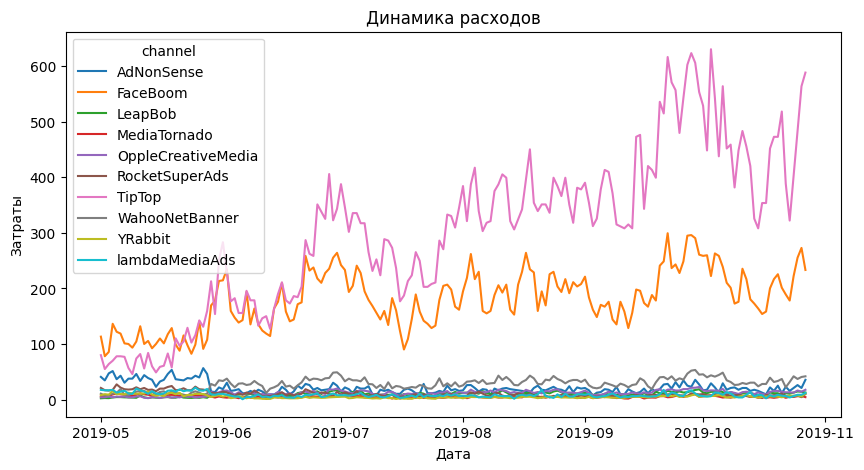

In [ ]:
costs_in_time.plot(figsize=(10,5))
plt.title('Динамика расходов')
plt.xlabel('Дата')
plt.ylabel('Затраты')

График очень резкие нужно добавить окно что бы сделать его плавнее и нагялднее

In [ ]:
window = 7

жПрименим функции filter_data для сглаживаниия данных

In [ ]:
df=filter_data(costs_in_time,window=7)
df

channel     AdNonSense    FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
dt                                                                              
2019-05-01         NaN         NaN      NaN           NaN                 NaN   
2019-05-02         NaN         NaN      NaN           NaN                 NaN   
2019-05-03         NaN         NaN      NaN           NaN                 NaN   
2019-05-04         NaN         NaN      NaN           NaN                 NaN   
2019-05-05         NaN         NaN      NaN           NaN                 NaN   
...                ...         ...      ...           ...                 ...   
2019-10-23       17.55  195.642857    10.68      4.320000           13.607143   
2019-10-24       19.20  204.757143    11.22      4.560000           14.071429   
2019-10-25       19.80  212.614286    11.49      4.834286           14.428571   
2019-10-26       20.55  220.628571    11.88      5.314286           14.214286   
2019-10-27       22.05  221.728571    12.06      5.348571           14.500000   

channel     RocketSuperAds  TipTop  WahooNetBanner   YRabbit  lambdaMediaAds  
dt                                                                            
2019-05-01             NaN     NaN             NaN       NaN             NaN  
2019-05-02             NaN     NaN             NaN       NaN             NaN  
2019-05-03             NaN     NaN             NaN       NaN             NaN  
2019-05-04             NaN     NaN             NaN       NaN             NaN  
2019-05-05             NaN     NaN             NaN       NaN             NaN  
...                    ...     ...             ...       ...             ...  
2019-10-23        7.800000   425.5       32.057143  5.631429        6.057143  
2019-10-24        7.428571   432.5       34.028571  5.824286        6.628571  
2019-10-25        7.428571   437.0       33.685714  6.094286        6.742857  
2019-10-26        6.917857   450.0       34.971429  6.094286        7.200000  
2019-10-27        7.242857   466.5       36.171429  6.904286        7.657143  

[180 rows x 10 columns]

Text(0, 0.5, 'Затраты')

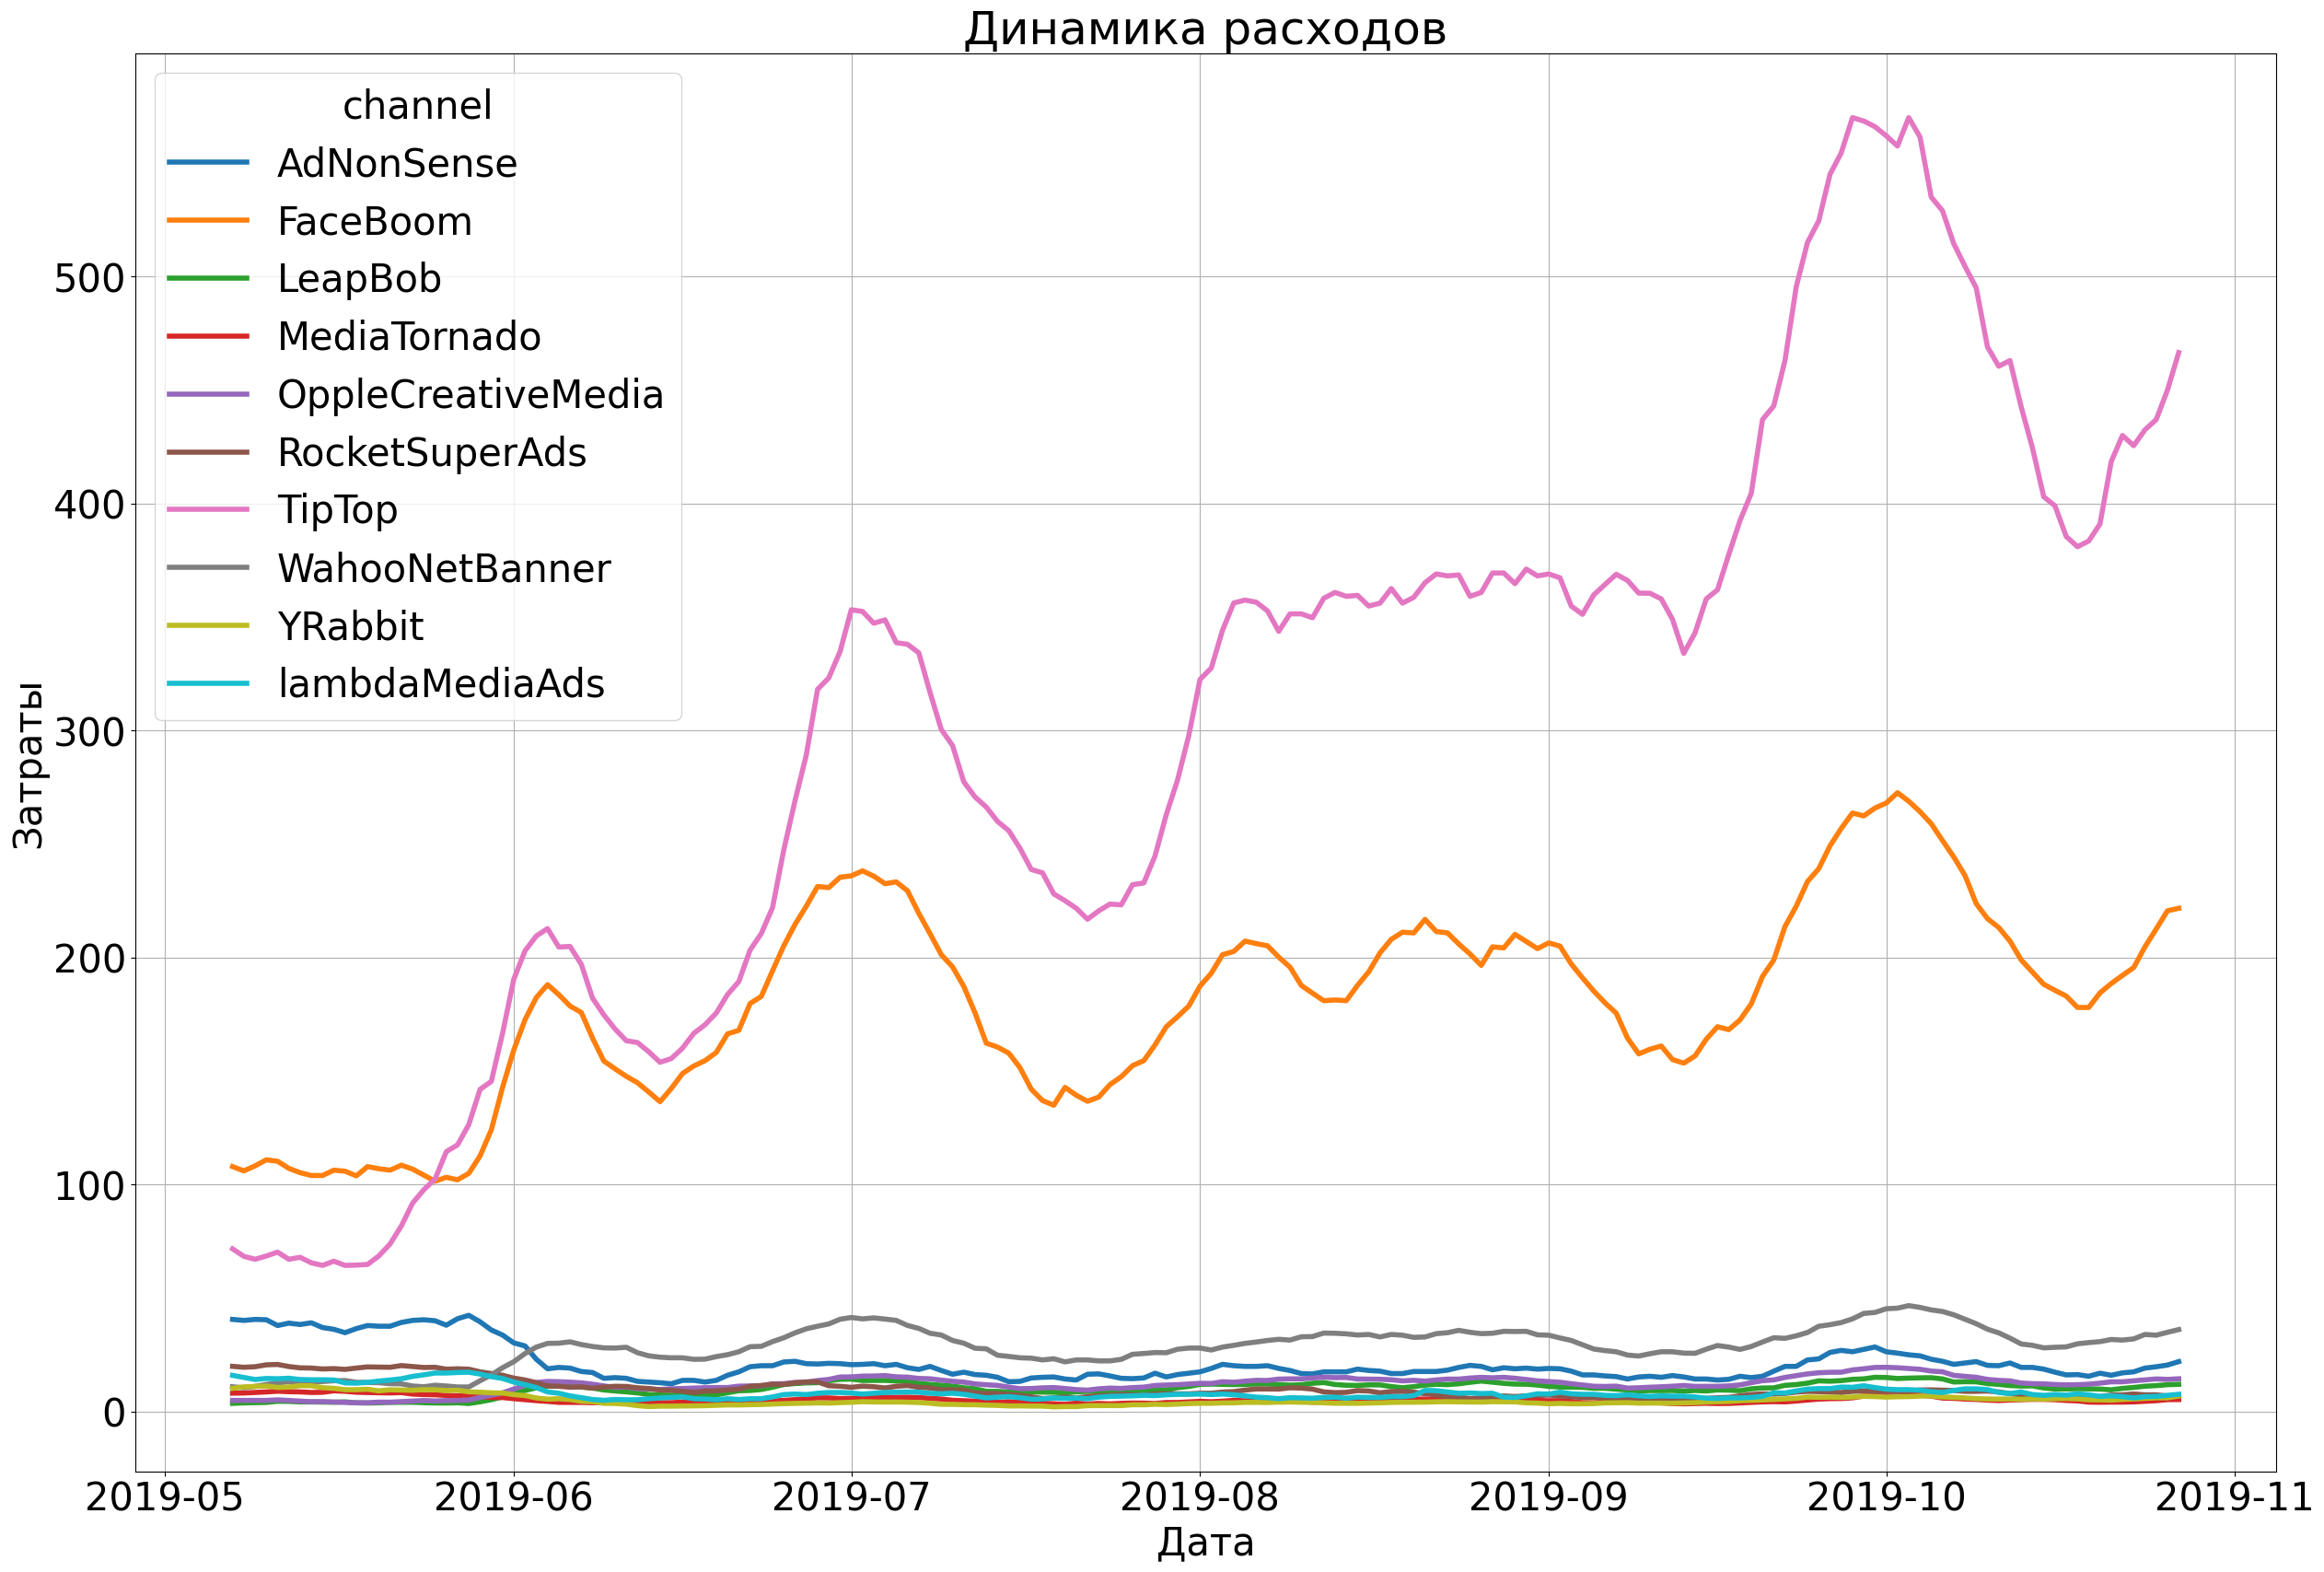

In [ ]:
plt.rcParams['font.size'] = '30'
df.plot(figsize=(30,20),linewidth= 4,grid=True)
plt.title('Динамика расходов')
plt.xlabel('Дата', fontsize=30)
plt.ylabel('Затраты', fontsize=30)

По графику видно что больше всего трат приходится на источники - TipTop и  FaceBoom, 3 место можно отдать WahooNetBanners хотя траты на нее не сильно отличаются от трат на остальные источники - можно сказать что по сравнению с вышеозвученными контрагентами все остальные в меньшей степени используются компанией (хотя при прочих равных возможно и зря).

In [ ]:
costs['month']=pd.to_datetime(costs['dt']).dt.month
costs['week']=pd.to_datetime(costs['dt']).dt.isocalendar().week
costs.head()

dt   channel  costs  month  week
0  2019-05-01  FaceBoom  113.3      5    18
1  2019-05-02  FaceBoom   78.1      5    18
2  2019-05-03  FaceBoom   85.8      5    18
3  2019-05-04  FaceBoom  136.4      5    18
4  2019-05-05  FaceBoom  122.1      5    18

In [ ]:
costs_in_month=costs.sort_values(by='month').pivot_table(index='month',columns='channel',values='costs',aggfunc='sum')
costs_in_week=costs.sort_values(by='week').pivot_table(index='week',columns='channel',values='costs',aggfunc='sum')
display(costs_in_month)
display(costs_in_week.head(5))

channel  AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
month                                                                      
5           1169.70    3524.4   140.28        238.56              169.75   
6            538.65    5501.1   314.58        138.00              370.00   
7            504.00    5294.3   313.53        138.48              366.50   
8            579.60    6274.4   369.81        154.56              439.25   
9            581.70    6114.9   343.98        144.72              427.75   
10           537.60    5736.5   315.42        140.16              378.00   

channel  RocketSuperAds   TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  
month                                                                      
5               577.980   2981.0           418.8   299.70           458.4  
6               325.715   6675.6           921.0   106.20           199.2  
7               252.070   8410.2           851.4    97.38           219.2  
8               253.110  11202.0          1040.4   124.74           220.0  
9               218.400  13232.5           977.4   152.79           247.2  
10              205.725  12250.0           942.0   163.41           213.6

channel  AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
week                                                                       
18           211.05     535.7    16.80         38.64               24.00   
19           273.00     750.2    31.71         61.68               34.50   
20           265.65     755.7    26.67         59.04               27.50   
21           266.70     722.7    26.67         50.16               34.25   
22           202.65    1208.9    65.52         36.96               81.75   

channel  RocketSuperAds  TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  
week                                                                      
18               99.450   347.0            49.2     52.2            81.6  
19              139.230   470.0            92.4     75.9           103.2  
20              138.060   454.0            90.0     69.3            90.4  
21              131.040   801.8            79.2     65.4           119.2  
22               97.695  1421.2           179.4     49.8            83.2

Text(0, 0.5, 'Затраты')

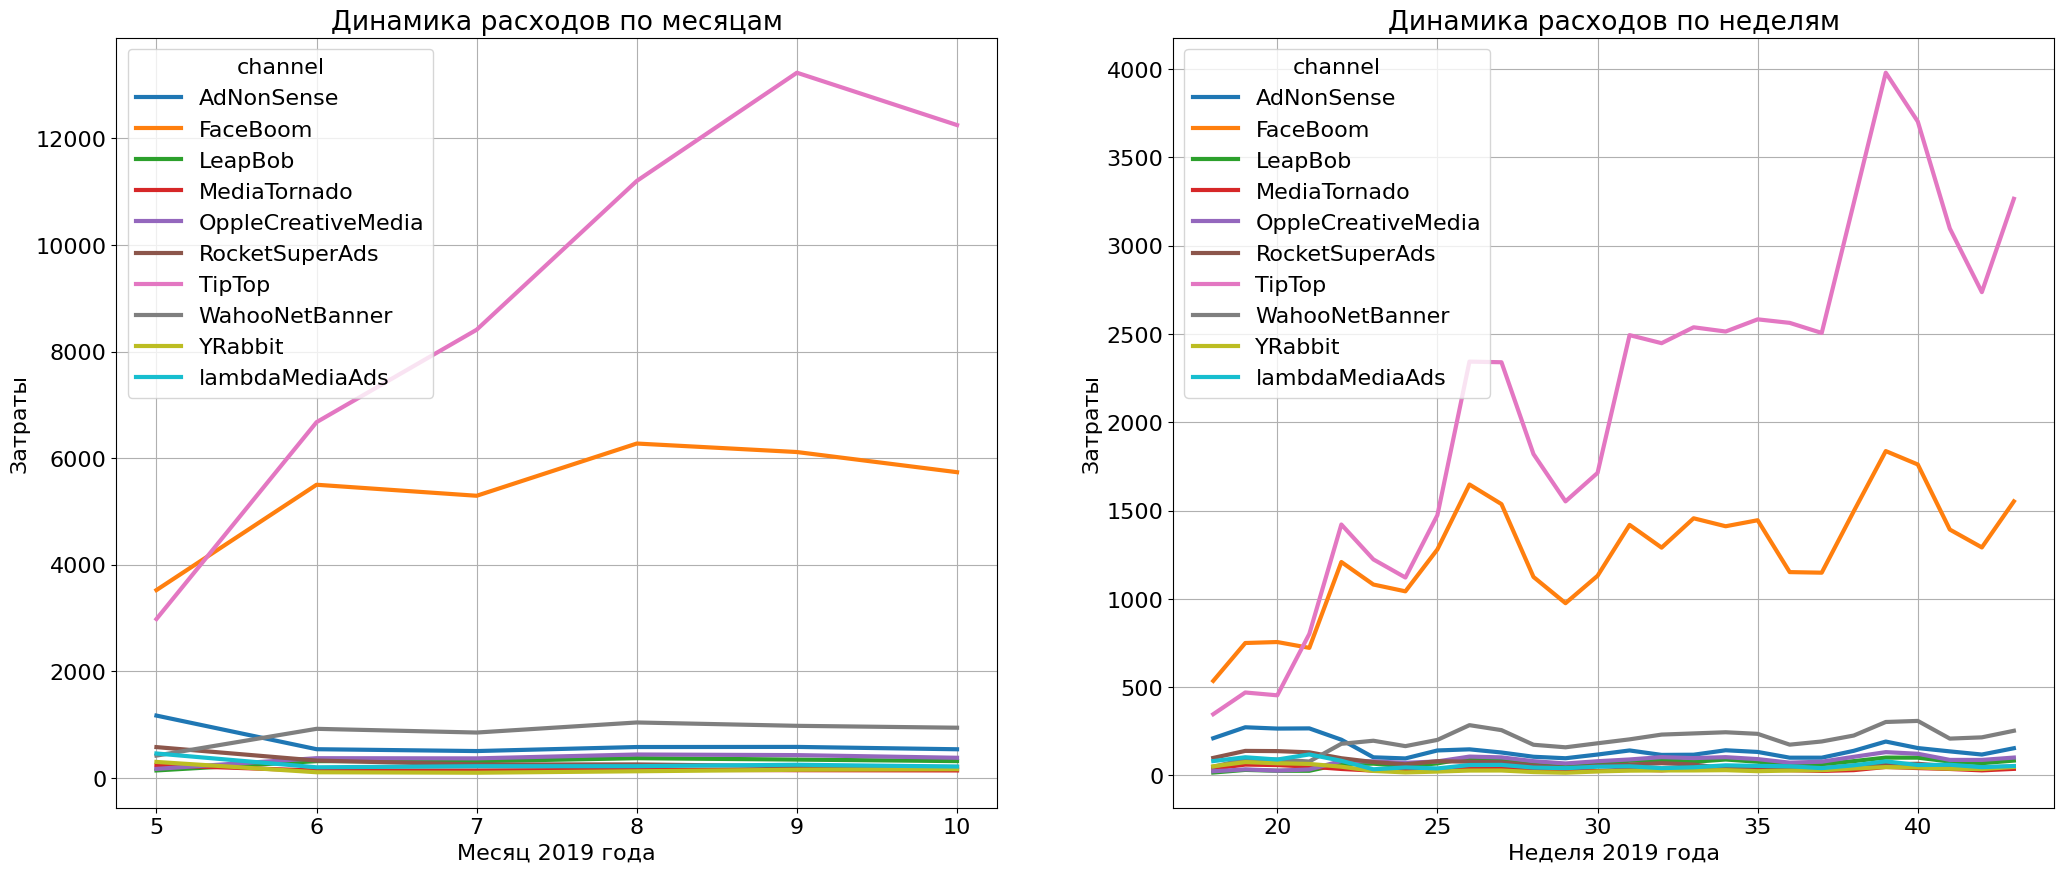

In [ ]:
plt.rcParams['font.size'] = '16'
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
costs_in_month.plot(ax=ax1,linewidth= 3,grid=True)
plt.title('Динамика расходов по месяцам')
plt.xlabel('Месяц 2019 года')
plt.ylabel('Затраты')
ax2=fig.add_subplot(1,2,2)
costs_in_week.plot(ax=ax2,figsize=(25,10),linewidth= 3,grid=True)
plt.title('Динамика расходов по неделям')
plt.xlabel('Неделя 2019 года')
plt.ylabel('Затраты')

По графику видно что больше всего трат приходится на источники - TipTop и FaceBoom, 3 место можно отдать WahooNetBanners хотя траты на нее не сильно отличаются от трат на остальные источники - можно сказать что по сравнению с вышеозвученными контрагентами все остальные в меньшей степени используются компанией (хотя при прочих равных возможно и зря).

**Вывод:**

**Больше всего трат приходится на источники - TipTop и FaceBoom, 3 место можно отдать WahooNetBanners хотя траты на нее не сильно отличаются от трат на остальные источники.**

# ---------------------------------------------------------------------------------------------------------------

#### Выясним сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [ ]:
cac1=round(profiles['acquisition_cost'].mean(),3)
print('С учетом органического трафика в среднем привлечение одного клиента стоит:',cac1)

С учетом органического трафика в среднем привлечение одного клиента стоит: 0.703


In [ ]:
cac2=round(profiles.query('channel!="organic"')['acquisition_cost'].mean(),3)
print('БЕЗ учета органического трафика в среднем привлечение одного клиента стоит:',cac2)

БЕЗ учета органического трафика в среднем привлечение одного клиента стоит: 1.127


In [ ]:
print('В среднем привлечение одного клиента стоит с каждого источника стоит:')
profiles.pivot_table(index='channel',values='acquisition_cost',aggfunc='mean').sort_values(by='acquisition_cost',ascending=False)

В среднем привлечение одного клиента стоит с каждого источника стоит:


acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172
organic                     0.000000

In [ ]:
print('Источники трафика с ценой выше среденей - CAC(с органическим трафиком):',cac1)
display(profiles.pivot_table(index='channel',values='acquisition_cost',aggfunc='mean').query('acquisition_cost>=@cac1'))
print('Источники трафика с ценой ниже среденей:',cac1)
display(profiles.pivot_table(index='channel',values='acquisition_cost',aggfunc='mean').query('acquisition_cost<=@cac1'))

Источники трафика с ценой выше среденей - CAC(с органическим трафиком): 0.703


acquisition_cost
channel                         
AdNonSense              1.008054
FaceBoom                1.113286
TipTop                  2.799003
lambdaMediaAds          0.724802

Источники трафика с ценой ниже среденей: 0.703


acquisition_cost
channel                             
LeapBob                     0.210172
MediaTornado                0.218717
OppleCreativeMedia          0.250000
RocketSuperAds              0.412095
WahooNetBanner              0.602245
YRabbit                     0.218975
organic                     0.000000

In [ ]:
print('Источники трафика с ценой выше среденей - CAC(БЕЗ органического трафика):',cac2)
display(profiles.pivot_table(index='channel',values='acquisition_cost',aggfunc='mean').query('acquisition_cost>=@cac2'))
print('Источники трафика с ценой ниже среденей:',cac2)
display(profiles.pivot_table(index='channel',values='acquisition_cost',aggfunc='mean').query('acquisition_cost<=@cac2'))

Источники трафика с ценой выше среденей - CAC(БЕЗ органического трафика): 1.127


acquisition_cost
channel                  
TipTop           2.799003

Источники трафика с ценой ниже среденей: 1.127


acquisition_cost
channel                             
AdNonSense                  1.008054
FaceBoom                    1.113286
LeapBob                     0.210172
MediaTornado                0.218717
OppleCreativeMedia          0.250000
RocketSuperAds              0.412095
WahooNetBanner              0.602245
YRabbit                     0.218975
lambdaMediaAds              0.724802
organic                     0.000000

**Вывод:**

**Органический трафик помогает в привлечении клиентов и можно сказать влияет на среднюю цену привлечения 1 клиента. Правда качество клиентов чаще всего оставляет желать лучшего.**

**С учетом органического трафика в среднем привлечение одного клиента стоит- 0.703. А БЕЗ учета органического трафика в среднем привлечение одного клиента стоит- 1.127. У FaceBoom и TipTop стоимость привлечение выше средней, у TipTop самая высокая стоимость привлечения на 1 клиента 2.8, она выше 2 по стоимости привлечения FaceBoom (1,11) больше чем в 2 раза – стоит обратить на это внимание. Органические пользователи естественно привлечены бесплатно, что и показывает таблица.**

# ---------------------------------------------------------------------------------------------------------------

#### ВЫВОД ПО ГЛАВЕ 4:
**Общая сумма расходов на маркетинг составила 105 497. Из всех расходов на маркетинг 30% пришлось на FaceBoom - это 32 445, 51% - на TipTop - это 54 751, остальные траты не заняли и 5%. Больше всего трат приходится на источники - TipTop и FaceBoom.**

**С учетом органического трафика в среднем привлечение одного клиента стоит- 0.703. А БЕЗ учета органического трафика в среднем привлечение одного клиента стоит- 1.127. У FaceBoom и TipTop стоимость привлечение выше средней, у TipTop самая высокая стоимость привлечения на 1 клиента 2.8 – стоит обратить на это внимание.**



Наиболее дорогостоящим каналом привлечения пользователей является TipTop, однако количество и доля платящих пользователей, приходящих с этого источника, не так высоки. Это можно объяснить молодой аудиторией TipTop'a и, соответственно, не очень высокой их платежеспособностью.
    
</div>

# ===============================================================

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

In [ ]:
horizon_days=14
horizon=14
observation_date=max_date

In [ ]:
profiles.loc[profiles['channel']=='organic','organic_status']='organic'
profiles.loc[profiles['channel']!='organic','organic_status']='not_organic'
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt               month  payer  acquisition_cost organic_status  
0  2019-05-07 2019-05-07 20:58:57   True          1.088172    not_organic  
1  2019-07-09 2019-07-09 12:46:07  False          1.107237    not_organic  
2  2019-10-01 2019-10-01 09:58:33  False          0.000000        organic  
3  2019-08-22 2019-08-22 21:35:48  False          0.988235    not_organic  
4  2019-10-02 2019-10-02 00:07:44  False          0.230769    not_organic

Добавим стобец с классификаций трафика на органический и не органический

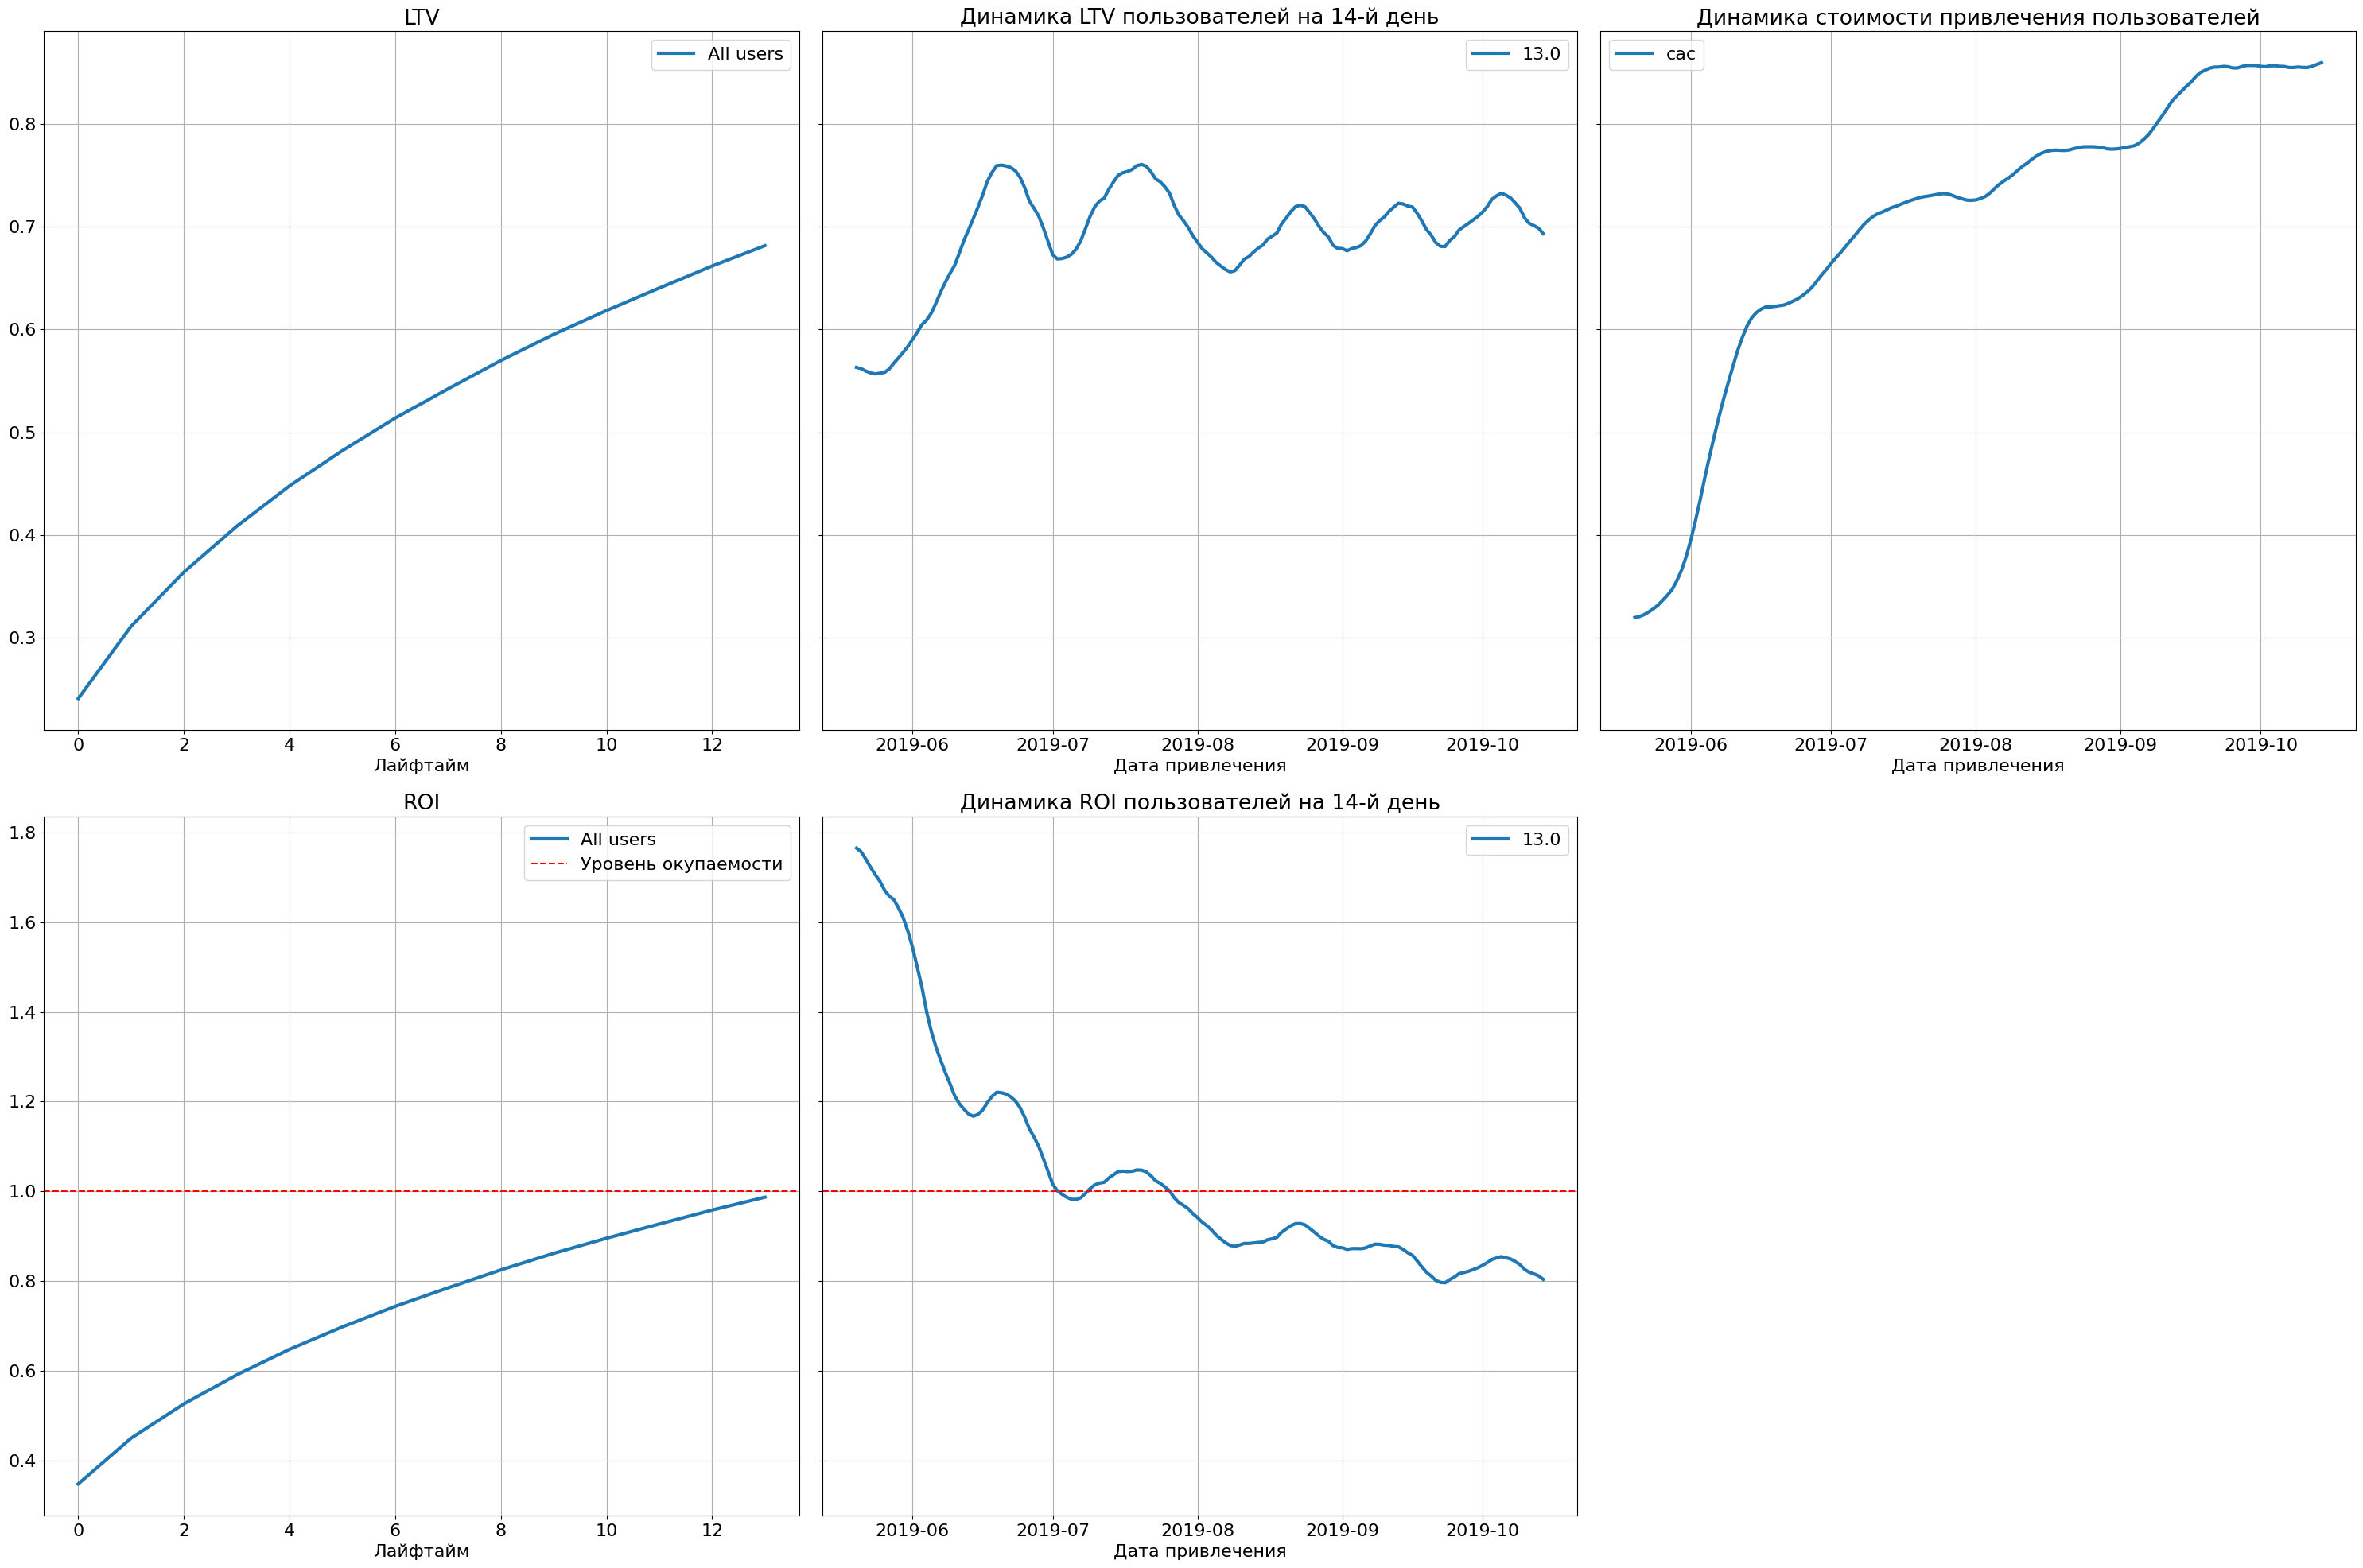

In [ ]:
result_raw,result_grouped, result_in_time,  roi_grouped, roi_in_time= get_ltv(profiles,
                                                                              orders,
                                                                              observation_date,
                                                                              horizon_days,
                                                                              dimensions=[],
                                                                              ignore_horizon=False)
df1=filter_data(result_in_time,window=7)
df2=filter_data(roi_in_time,window=7)


plt.rcParams['font.size'] = '16'
plott=plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon, window=14)
plott

С учетом органических пользователей (то есть всех пользователей) LTV растет c 0.58 до 0.7, а затраты на привлечение пользователей растут с 0.33 до 0.87.
Как видно что доходы не попевают с расходами в общем - и что хуже всего что тренд негативный. То есть вначале реклама окупается но уже к середине июля она перестает это делать.

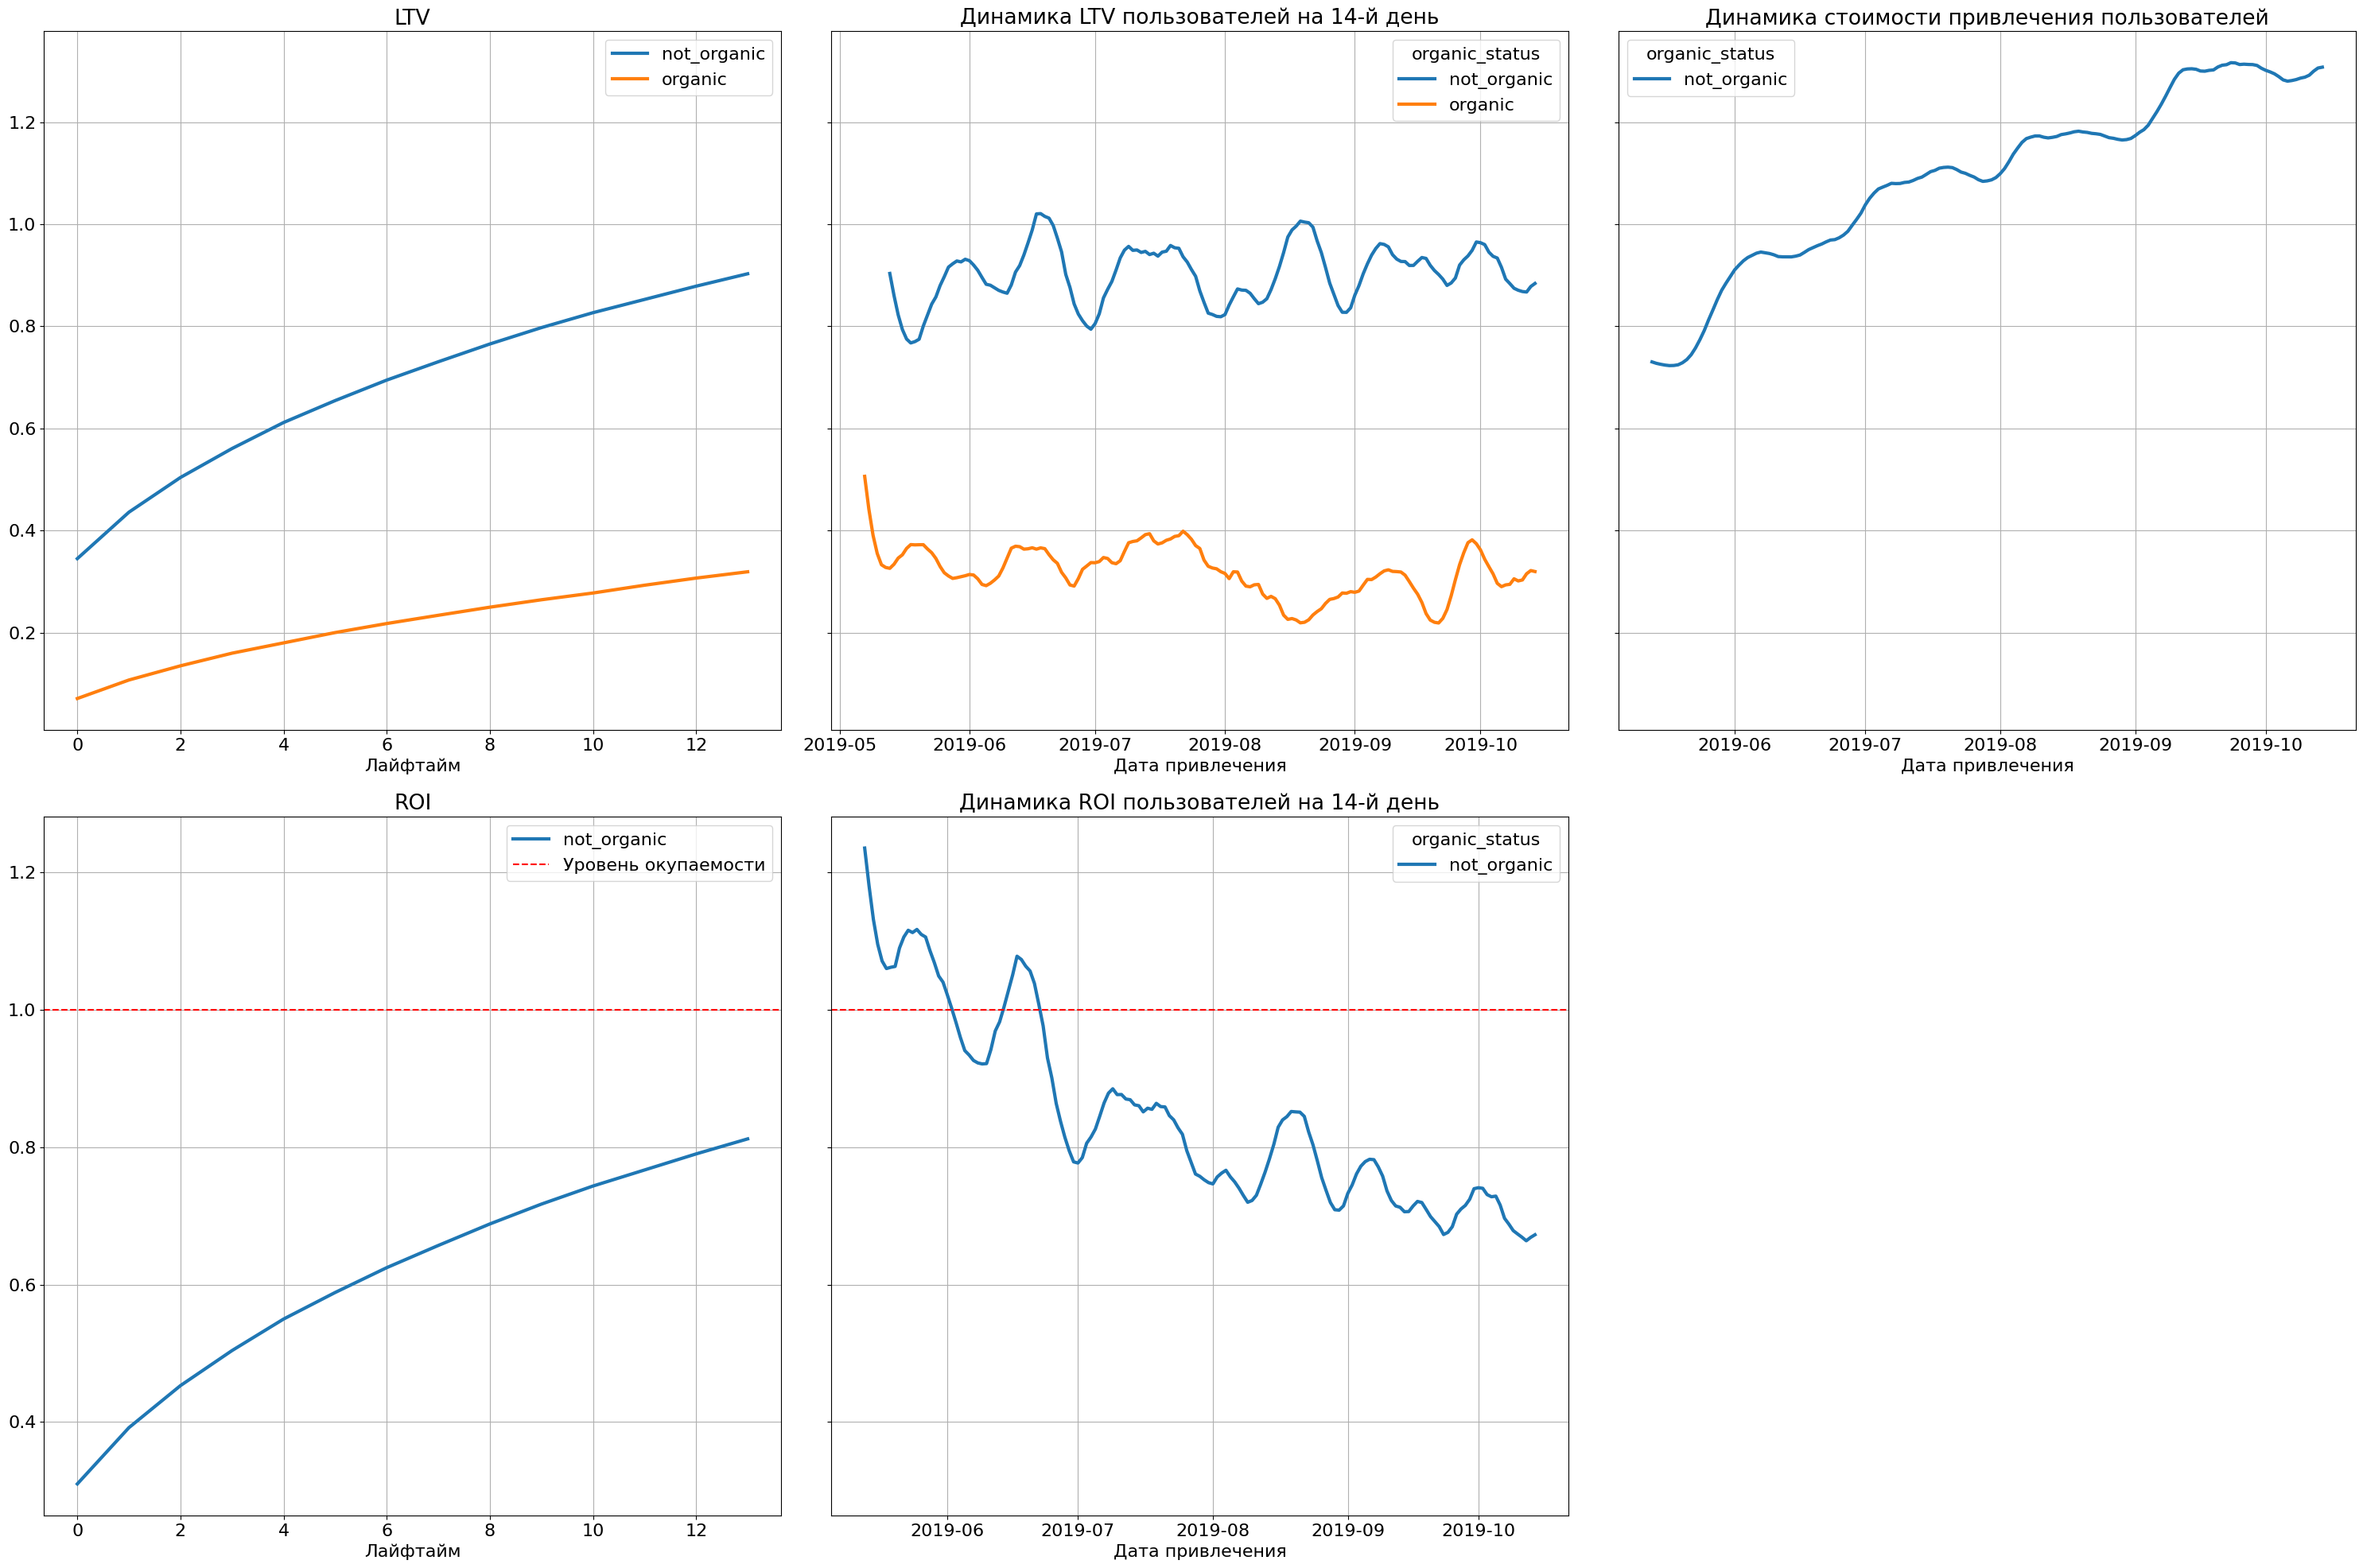

In [ ]:
result_raw,result_grouped, result_in_time,  roi_grouped, roi_in_time= get_ltv(profiles,
                                                                              orders,
                                                                              observation_date,
                                                                              horizon_days,
                                                                              dimensions=['organic_status'],
                                                                              ignore_horizon=False)
df1=filter_data(result_in_time,window=7)
df2=filter_data(roi_in_time,window=7)


plt.rcParams['font.size'] = '16'
plot2=plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon, window=7)
plot2

БЕЗ учета органических пользователей дела еще хуже LTV не растет или растет слабо на всем промежутке и держится в районе 0.9, а затраты на привлечение пользователей растут с 0.75 до 1.3. Как видно что доходы не поспевают за расходами - и что хуже всего что тренд негативный. То есть вначале реклама окупается но уже к середине июля она перестает это делать.

**Вывод:**
**С учетом органических пользователей (то есть всех пользователей) LTV растет c 0.58 до 0.7, а затраты на привлечение пользователей растут с 0.33 до 0.87. БЕЗ учета органических пользователей дела еще хуже LTV не растет или растет слабо на всем промежутке и держится в районе 0.9, а затраты на привлечение пользователей растут с 0.75 до 1.3. Ситуация не сильно отличается в двух случаях. Как видно что доходы не попевают за расходами в общем - и что хуже всего что тренд негативный. То есть вначале реклама окупается но уже к середине июля она перестает это делать.**


# ---------------------------------------------------------------------------------------------------------------

 Наблюдаем, что динамика ROI за лайфтайм падает. При относительно стабильной динамике LTV, динамика САС растёт с мая по конец октября. Эту закономерность мы наблюдаем в динамике ROI, что при сильном увеличении САС, в равной степени падает динамика ROI пользователей.


#### Построим и проанализируем графики конверсии и ее истории(динамики), удержания и историю удержания.

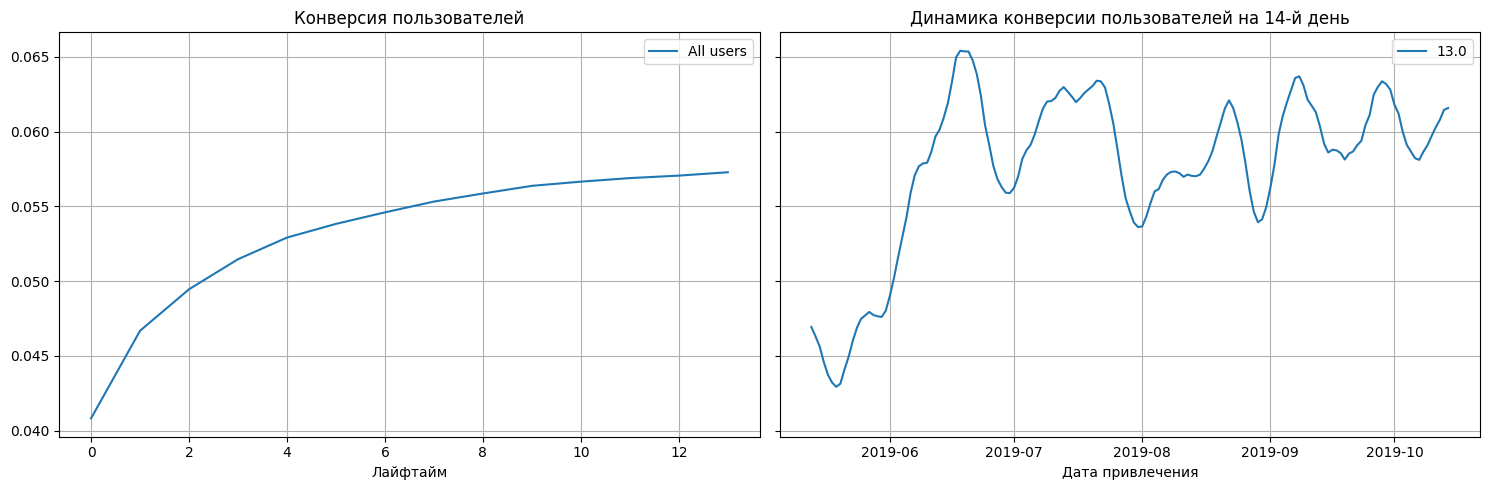

In [ ]:
result_raw, result_grouped, result_in_time =get_conversion(profiles,orders,max_date,horizon_days,
    dimensions=[],  ignore_horizon=False)
df3=filter_data(result_in_time,window=7)
plt.rcParams['font.size'] = '10'
plot_conversion(result_grouped, result_in_time, horizon, window=7)

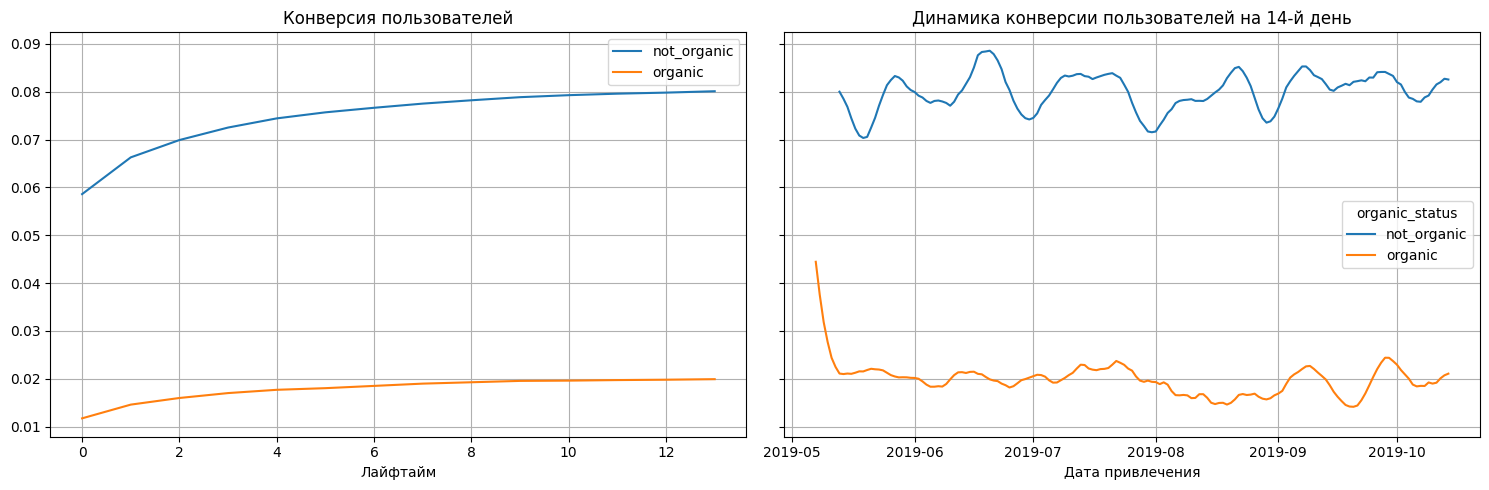

In [ ]:
result_raw, result_grouped, result_in_time =get_conversion(profiles,orders,max_date,horizon_days,
    dimensions=['organic_status'],  ignore_horizon=False)
df3=filter_data(result_in_time,window=7)
plt.rcParams['font.size'] = '10'
plot_conversion(result_grouped, result_in_time, horizon, window=7)

Как и предполагалось привлеченные пользователи лучше органических.

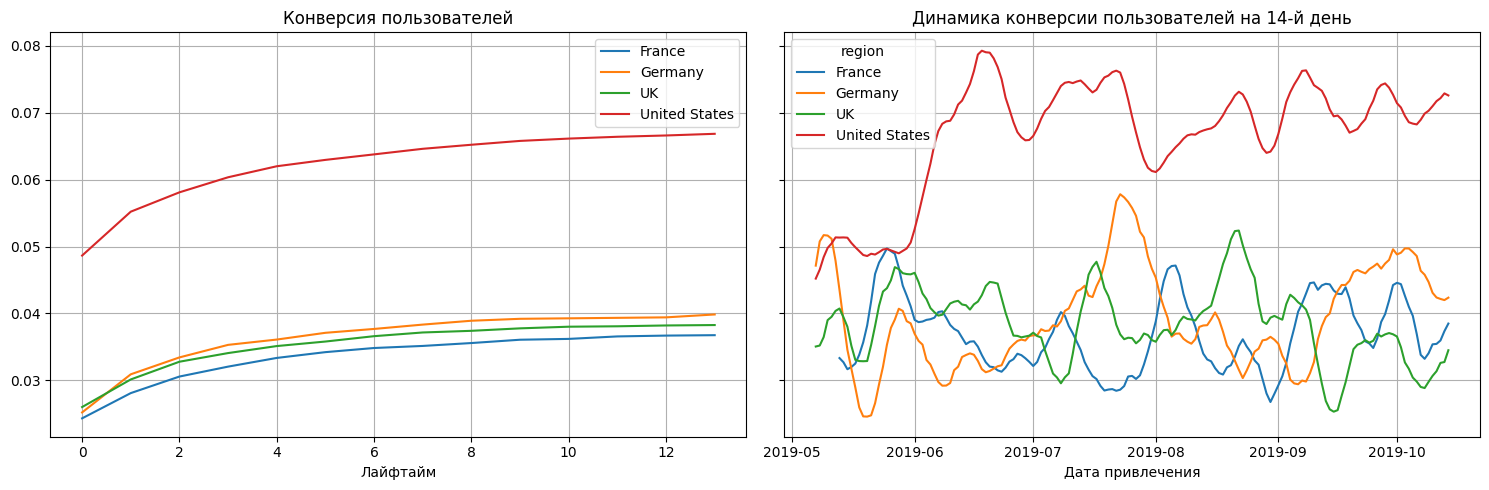

In [ ]:
result_raw, result_grouped, result_in_time =get_conversion(profiles,orders,max_date,horizon_days,
    dimensions=['region'],  ignore_horizon=False)
df3=filter_data(result_in_time,window=7)
plt.rcParams['font.size'] = '10'
plot_conversion(result_grouped, result_in_time, horizon, window=7)

В США высокая конверсия пользователей. У пользователей из других регионов примерно одинаковая конверсия за полгода.

Похоже, что пользователям США больше нравится данное приложение

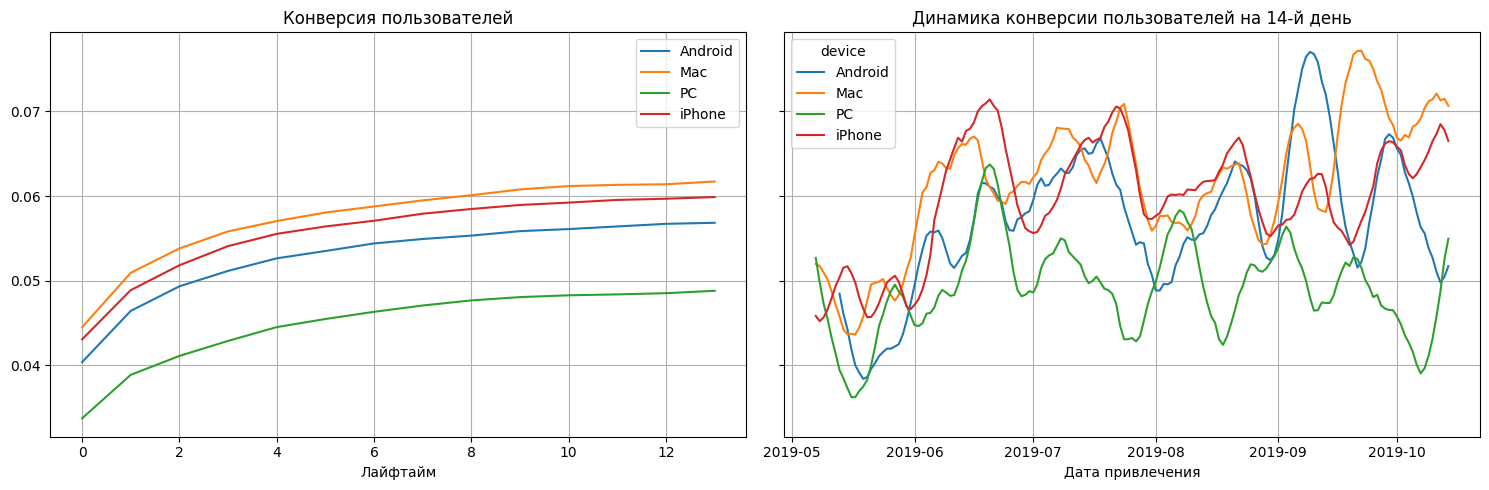

In [ ]:
result_raw, result_grouped, result_in_time =get_conversion(profiles,orders,max_date,horizon_days,
    dimensions=['device'],  ignore_horizon=False)
df3=filter_data(result_in_time,window=7)
plt.rcParams['font.size'] = '10'
plot_conversion(result_grouped, result_in_time, horizon, window=7)

Хотя и на графике динамике все в перемешку но в среднем есть четкие закономерности. Конверсия пользователй по убыванию: Mac>IPhone>Android>PC. То есть самые качественные клиенты с Mac и IPhone, похуже пользователи Android и совсем плохо юзеры ПК.

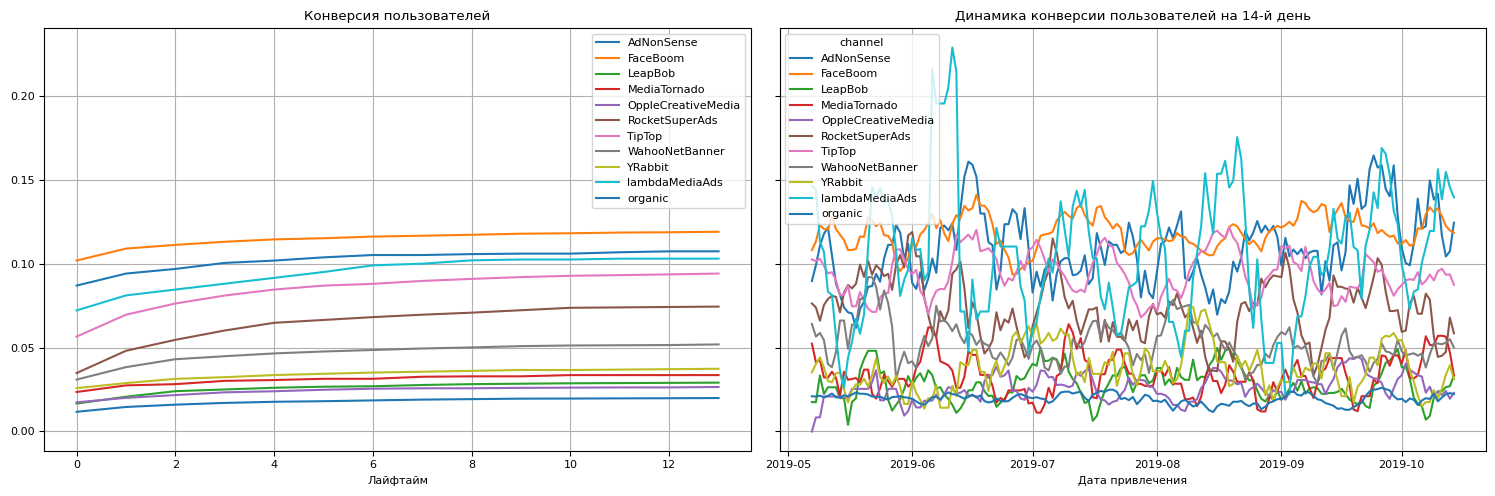

In [ ]:
result_raw, result_grouped, result_in_time =get_conversion(profiles,orders,max_date,horizon_days,
    dimensions=['channel'],  ignore_horizon=False)
#df3=filter_data(result_in_time,window=14)
plt.rcParams['font.size'] = '8'
plot_conversion(result_grouped, result_in_time, horizon, window=7)

In [ ]:
result_grouped_t=result_grouped.drop(columns='cohort_size')
result_grouped_t.head()

0.0       1.0       2.0       3.0       4.0  \
channel                                                                
AdNonSense          0.086849  0.094017  0.096774  0.100358  0.101737   
FaceBoom            0.101773  0.108879  0.111086  0.112956  0.114340   
LeapBob             0.016635  0.020698  0.024000  0.025016  0.026032   
MediaTornado        0.023524  0.027444  0.028179  0.030140  0.030630   
OppleCreativeMedia  0.017364  0.020025  0.021673  0.023321  0.023954   

                         5.0       6.0       7.0       8.0       9.0  \
channel                                                                
AdNonSense          0.103667  0.105045  0.105045  0.105597  0.105873   
FaceBoom            0.115051  0.116023  0.116547  0.117108  0.117744   
LeapBob             0.026667  0.026921  0.027683  0.028190  0.028444   
MediaTornado        0.031365  0.031365  0.032590  0.032835  0.032835   
OppleCreativeMedia  0.024842  0.025475  0.025729  0.025729  0.025982   

                        10.0      11.0      12.0      13.0  
channel                                                     
AdNonSense          0.105873  0.106700  0.107251  0.107251  
FaceBoom            0.118006  0.118417  0.118604  0.118903  
LeapBob             0.028698  0.028825  0.028952  0.029079  
MediaTornado        0.033570  0.033570  0.033570  0.033570  
OppleCreativeMedia  0.026109  0.026236  0.026236  0.026489

In [ ]:
result_grouped_t=result_grouped_t.cumsum(axis=1).reset_index()[['channel',13]]
result_grouped_t[13]=result_grouped_t[13]/14
result_grouped_t.rename(columns = {13:'mean_grouped'}, inplace = True )
display(result_grouped_t.sort_values(by='mean_grouped',ascending=False))
print()
result_in_time_t=result_in_time[13].reset_index().pivot_table(index='channel',values=13, aggfunc='mean').reset_index()
result_in_time_t.rename(columns = {13:'mean_in_time'}, inplace = True )
print()
display(result_in_time_t.sort_values(by='mean_in_time',ascending=False))
display(result_in_time_t.sort_values(by='mean_in_time',ascending=False).merge(result_grouped_t,on='channel'))
print()
print('Список от самого качественного источника до самого некачественного:',list((result_in_time_t.sort_values(by='mean_in_time',ascending=False).merge(result_grouped_t,on='channel')['channel'])))

channel  mean_grouped
1             FaceBoom      0.114674
0           AdNonSense      0.102288
9       lambdaMediaAds      0.094717
6               TipTop      0.084860
5       RocketSuperAds      0.064651
7       WahooNetBanner      0.046841
8              YRabbit      0.034103
3         MediaTornado      0.031085
2              LeapBob      0.026132
4   OppleCreativeMedia      0.024226
10             organic      0.017885

channel  mean_in_time
1             FaceBoom      0.118855
0           AdNonSense      0.108399
9       lambdaMediaAds      0.106167
6               TipTop      0.093736
5       RocketSuperAds      0.073584
7       WahooNetBanner      0.052947
8              YRabbit      0.037627
3         MediaTornado      0.033909
2              LeapBob      0.028034
4   OppleCreativeMedia      0.025332
10             organic      0.019649

channel  mean_in_time  mean_grouped
0             FaceBoom      0.118855      0.114674
1           AdNonSense      0.108399      0.102288
2       lambdaMediaAds      0.106167      0.094717
3               TipTop      0.093736      0.084860
4       RocketSuperAds      0.073584      0.064651
5       WahooNetBanner      0.052947      0.046841
6              YRabbit      0.037627      0.034103
7         MediaTornado      0.033909      0.031085
8              LeapBob      0.028034      0.026132
9   OppleCreativeMedia      0.025332      0.024226
10             organic      0.019649      0.017885


Список от самого качественного источника до самого некачественного: ['FaceBoom', 'AdNonSense', 'lambdaMediaAds', 'TipTop', 'RocketSuperAds', 'WahooNetBanner', 'YRabbit', 'MediaTornado', 'LeapBob', 'OppleCreativeMedia', 'organic']


Отсортированная по убыванию значений таблица средних конверсий за весь период

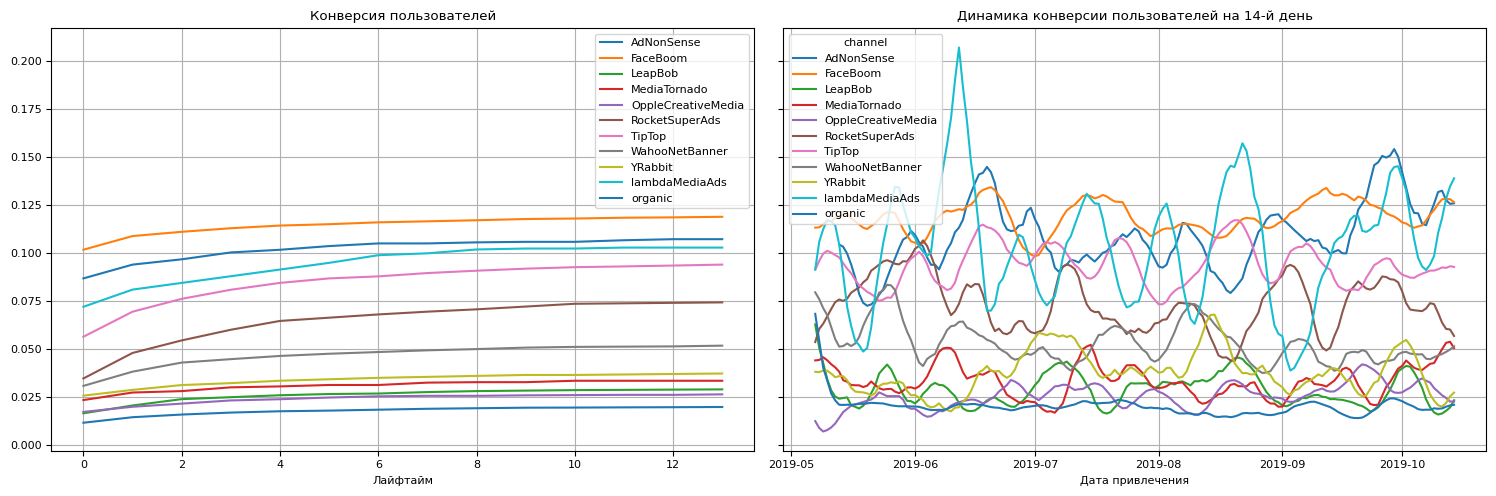

In [ ]:
df3=filter_data(result_in_time,window=7)
plt.rcParams['font.size'] = '8'
plot_conversion(result_grouped, result_in_time, horizon, window=7)

Самые качественные каналы привлечения по конверсии: FaceBoom, AdNonSense, lambdaMediaAds, TipTop.
Самые некачественные каналы: LeapBob, OppleCreativeMedia, organic(органический трафик) - 2 источника тут настолько плохи, что почти не отличаются от органических пользователей - они плохо конвертируются в покупателй.

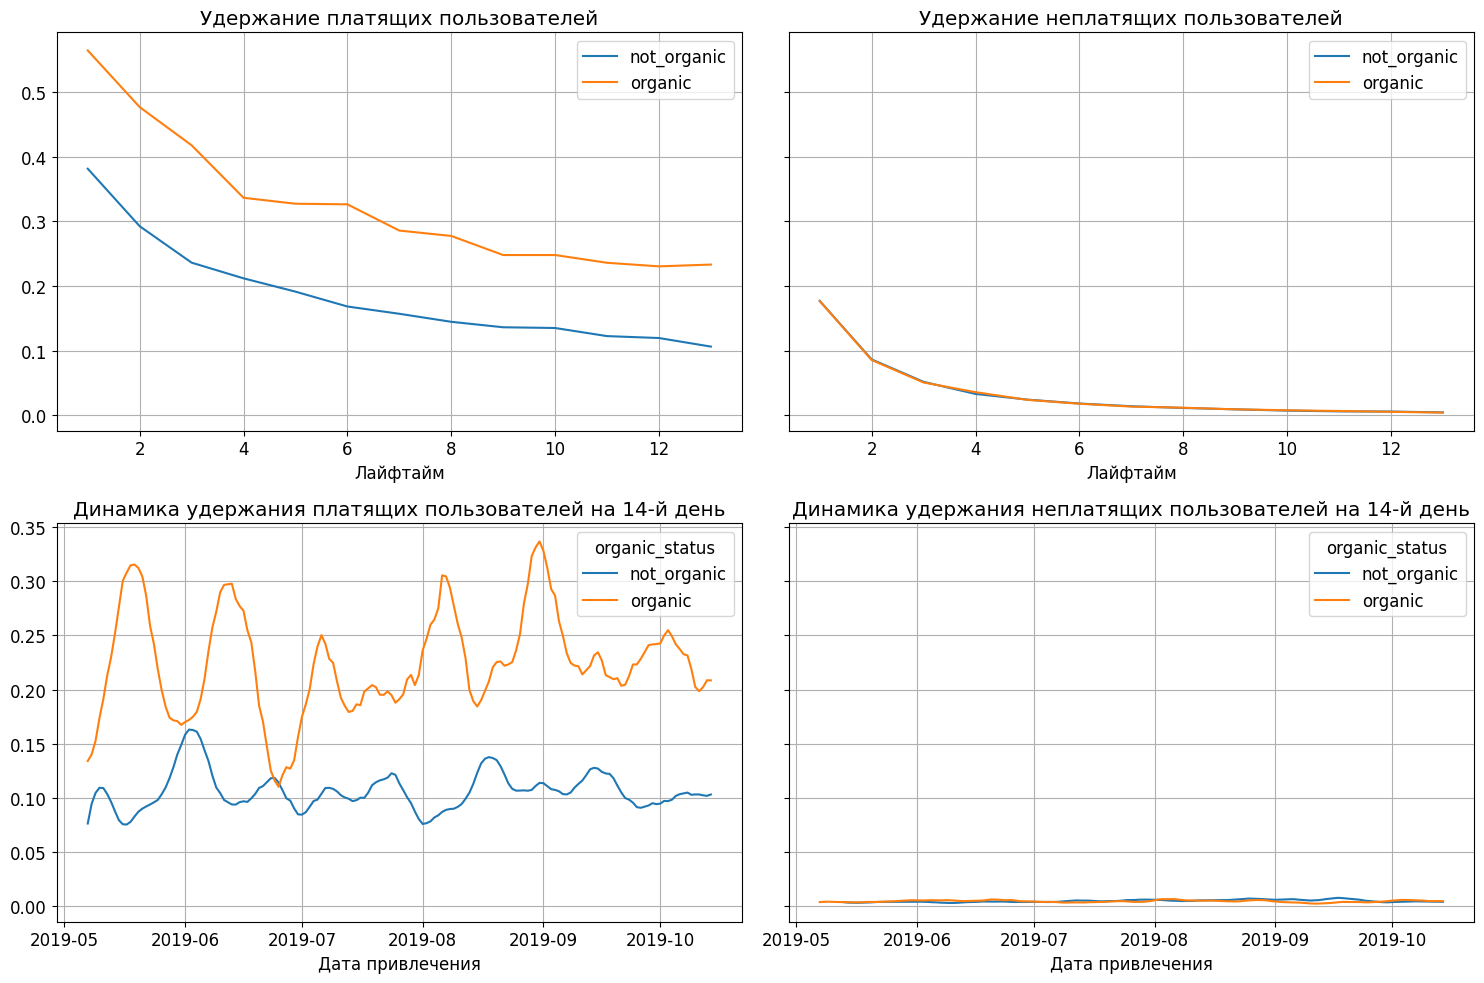

In [ ]:
result_raw2, result_grouped2, result_in_time2 =get_retention(profiles,visits,max_date,horizon_days,
    dimensions=['organic_status'],ignore_horizon=False)
df4=filter_data(result_in_time2,window=7)
plt.rcParams['font.size'] = '12'
plot_retention(result_grouped2, result_in_time2, horizon, window=7)

Видно интересную особенность - удержание органических пользователей выше чем привлеченных со стороны.

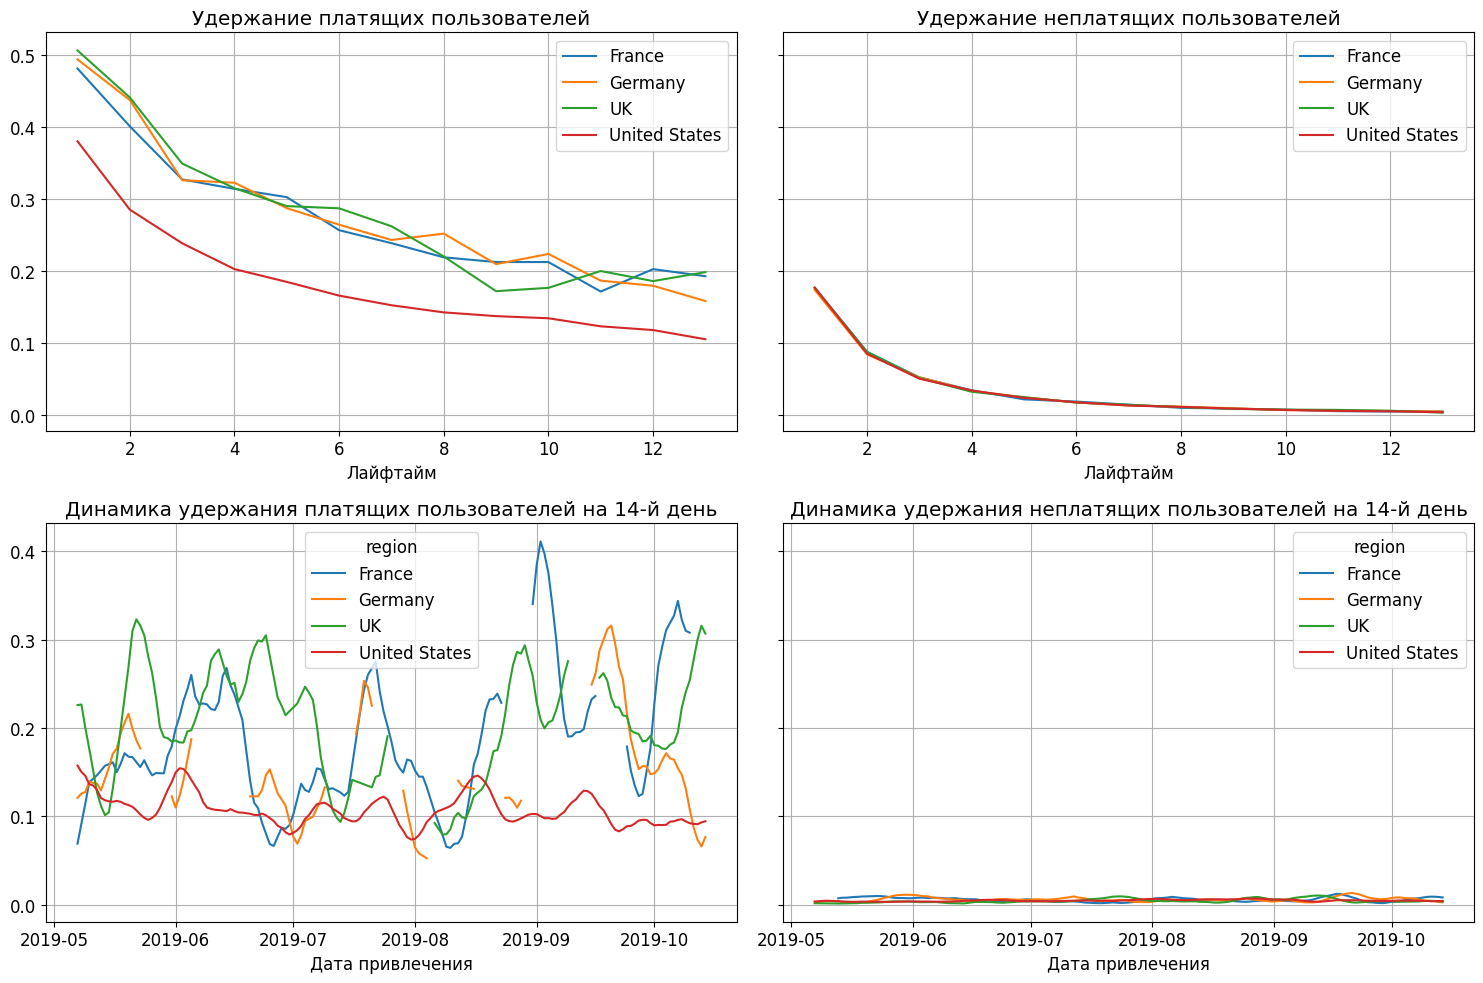

In [ ]:
result_raw2, result_grouped2, result_in_time2 =get_retention(profiles,visits,max_date,horizon_days,
    dimensions=['region'],ignore_horizon=False)
df4=filter_data(result_in_time2,window=7)
plot_retention(result_grouped2, result_in_time2, horizon, window=7)

Есть проблемы с удержанием платящих пользователей из США, оно ниже всех остальных - все остальные примерно на одном уровне. Возможно из-за этого наш продукт не окупается.

In [ ]:
profiles_problems=profiles.query('region=="United States"')
profiles_problems.head(3)

user_id            first_ts   channel  device         region          dt  \
0    599326 2019-05-07 20:58:57  FaceBoom     Mac  United States  2019-05-07   
1   4919697 2019-07-09 12:46:07  FaceBoom  iPhone  United States  2019-07-09   
4  31989216 2019-10-02 00:07:44   YRabbit  iPhone  United States  2019-10-02   

                month  payer  acquisition_cost organic_status  
0 2019-05-07 20:58:57   True          1.088172    not_organic  
1 2019-07-09 12:46:07  False          1.107237    not_organic  
4 2019-10-02 00:07:44  False          0.230769    not_organic

У США проблема с удержанием и лучше рассмотреть этот регион отдельно

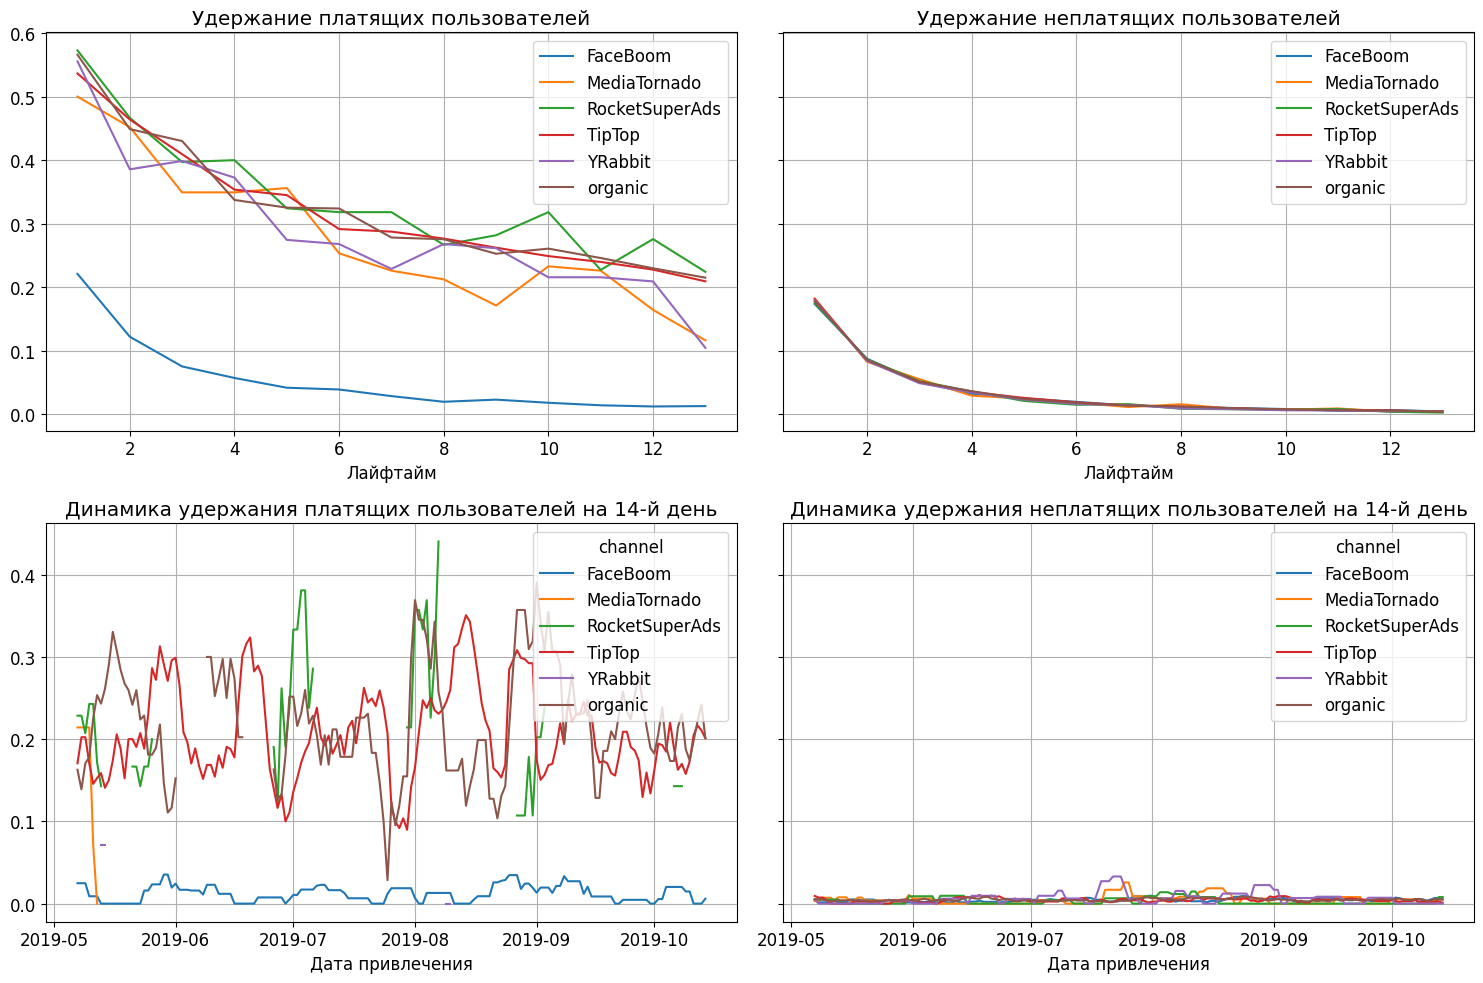

In [ ]:
result_raw2, result_grouped2, result_in_time2 =get_retention(profiles_problems,visits,max_date,horizon_days,
    dimensions=['channel'],ignore_horizon=False)
#df4=filter_data(result_in_time2,window=7)
plot_retention(result_grouped2, result_in_time2, horizon, window=7)

Очень некачественные пользователи из трафика FaceBom - удержание у них ниже всех, когда у остальных почти на одном уровне. В некоторые моменты врмени все клиенты от этого источника уходят (то есть иногда никого не остается). У этого источника удержание на порядок ниже чем у остальных.

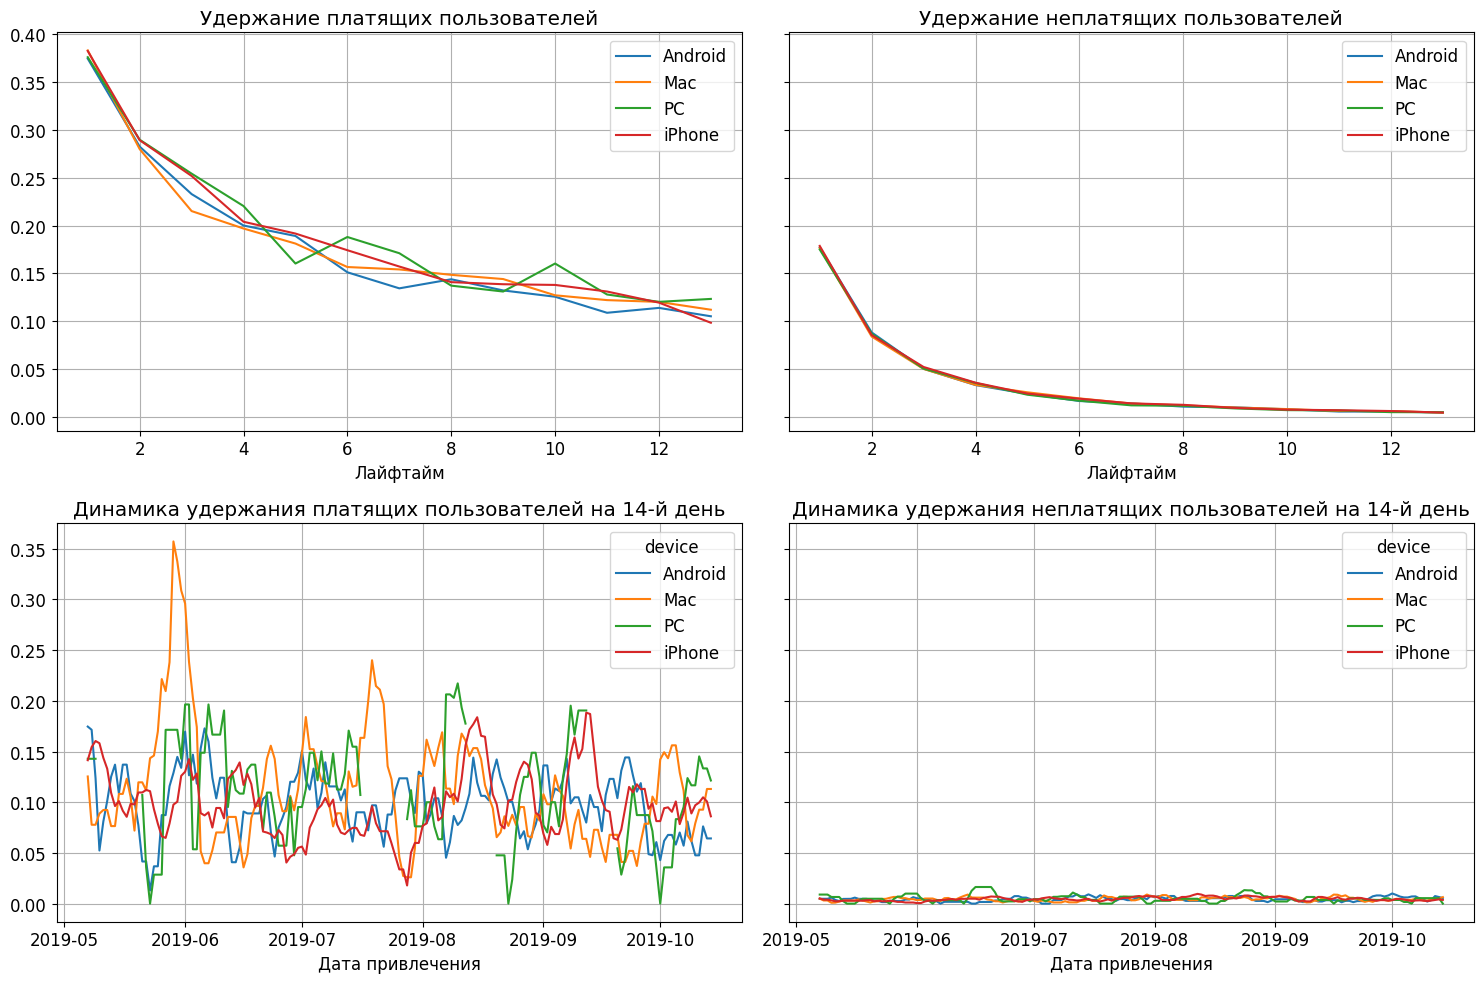

In [ ]:
result_raw2, result_grouped2, result_in_time2 =get_retention(profiles_problems,visits,max_date,horizon_days,
    dimensions=['device'],ignore_horizon=False)
#df4=filter_data(result_in_time2,window=7)
plot_retention(result_grouped2, result_in_time2, horizon, window=7)

Тут ситуация примерно равная - почти все устройства на одном уровне.

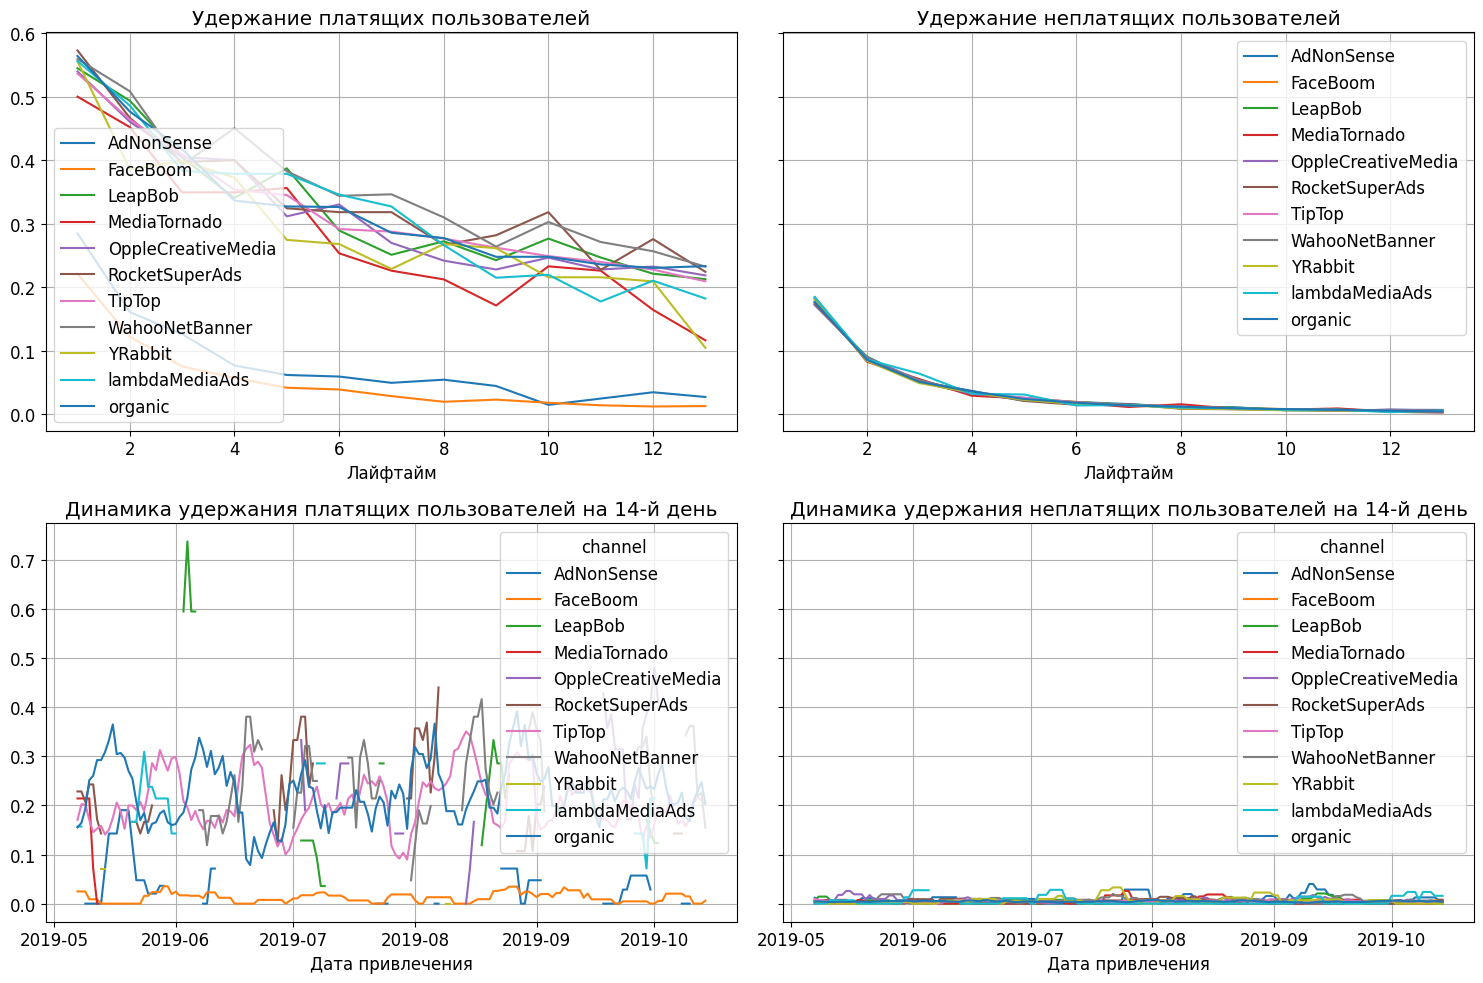

In [ ]:
result_raw2, result_grouped_channel, result_in_time_channel =get_retention(profiles,visits,max_date,horizon_days,
    dimensions=['channel'],ignore_horizon=False)
#df4=filter_data(result_in_time2,window=7)
plot_retention(result_grouped_channel, result_in_time_channel, horizon, window=7)

Как видно что кроме разобранного FaceBoom также проблемы так же есть и у AdNonSense - разберем его попробробнее.

In [ ]:
profiles_problems_2=profiles.query('channel=="AdNonSense"')
profiles_problems_2.head(3)

user_id            first_ts     channel   device   region          dt  \
3     22593348 2019-08-22 21:35:48  AdNonSense       PC  Germany  2019-08-22   
7     46006712 2019-06-30 03:46:29  AdNonSense  Android   France  2019-06-30   
128  804813198 2019-08-01 14:25:13  AdNonSense       PC  Germany  2019-08-01   

                  month  payer  acquisition_cost organic_status  
3   2019-08-22 21:35:48  False          0.988235    not_organic  
7   2019-06-30 03:46:29   True          1.008000    not_organic  
128 2019-08-01 14:25:13  False          0.933333    not_organic

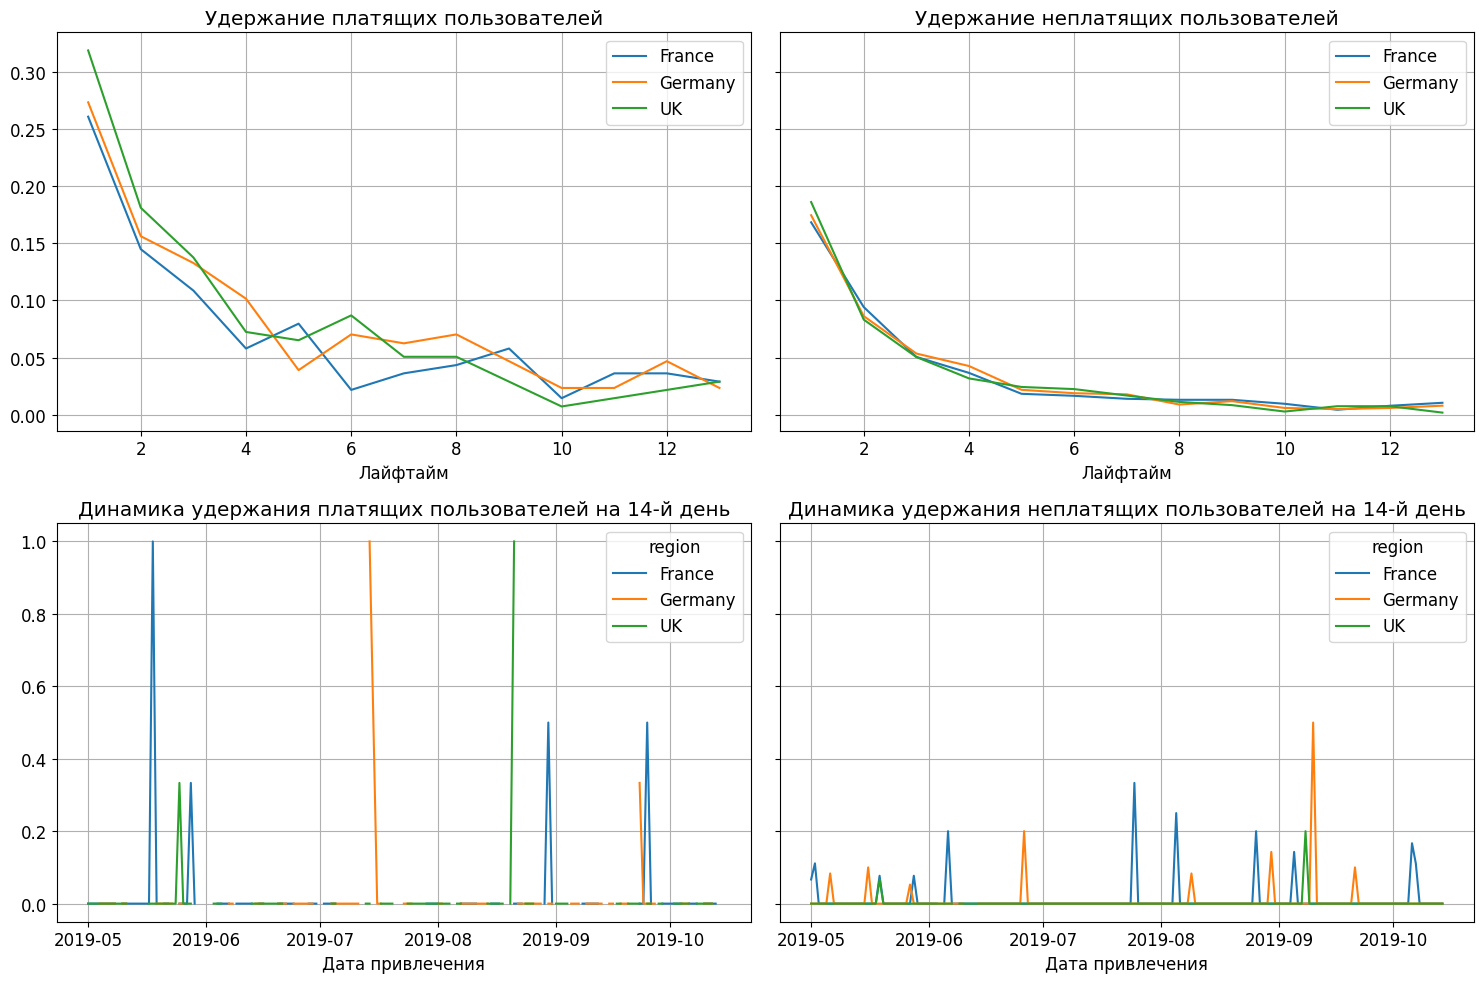

In [ ]:
result_raw2, result_grouped2, result_in_time2 =get_retention(profiles_problems_2,visits,max_date,horizon_days,
    dimensions=['region'],ignore_horizon=False)
#df4=filter_data(result_in_time2,window=7)
plot_retention(result_grouped2, result_in_time2, horizon, window=1)

Очень некачественные пользователи из трафика AdNonSense - данный источник не работает в США поэтому, он не может быть причиной сниженных результатов удержания там. В некоторые моменты врмени все клиенты от этого источника уходят (то есть иногда никого не остается). У этого источника удержание на порядок ниже чем у остальных.

In [ ]:
print('Таблица платящих:')
result_grouped_channel_payer=result_grouped_channel.reset_index().query('payer==True').set_index('channel').drop(columns=['payer','cohort_size',0])
display(result_grouped_channel_payer.head(3))
print('Таблица НЕ платящих:')
result_grouped_channel_not_payer=result_grouped_channel.reset_index().query('payer==False').set_index('channel').drop(columns=['payer','cohort_size',0])
display(result_grouped_channel_not_payer.head(3))

Таблица платящих:


1         2         3         4         5         6  \
channel                                                                  
AdNonSense  0.284653  0.160891  0.126238  0.076733  0.061881  0.059406   
FaceBoom    0.221027  0.122041  0.075315  0.057178  0.041808  0.039041   
LeapBob     0.544681  0.493617  0.404255  0.340426  0.387234  0.289362   

                   7         8         9        10        11        12  \
channel                                                                  
AdNonSense  0.049505  0.054455  0.044554  0.014851  0.024752  0.034653   
FaceBoom    0.028589  0.019674  0.023056  0.018137  0.014141  0.012296   
LeapBob     0.251064  0.272340  0.242553  0.276596  0.246809  0.221277   

                  13  
channel               
AdNonSense  0.027228  
FaceBoom    0.012911  
LeapBob     0.212766

Таблица НЕ платящих:


1         2         3         4         5         6  \
channel                                                                  
AdNonSense  0.176233  0.088117  0.051505  0.036922  0.021409  0.019237   
FaceBoom    0.173530  0.087382  0.050718  0.032406  0.024954  0.019589   
LeapBob     0.172120  0.090707  0.051047  0.031937  0.023429  0.019241   

                   7         8         9        10        11        12  \
channel                                                                  
AdNonSense  0.016134  0.011170  0.011170  0.006205  0.005585  0.007136   
FaceBoom    0.013712  0.011753  0.009879  0.008261  0.005493  0.006728   
LeapBob     0.014660  0.010864  0.010471  0.007461  0.006675  0.005366   

                  13  
channel               
AdNonSense  0.006826  
FaceBoom    0.004471  
LeapBob     0.004712

In [ ]:
result_grouped_channel_payer=result_grouped_channel_payer.cumsum(axis=1).reset_index()[['channel',13]]
result_grouped_channel_payer[13]=result_grouped_channel_payer[13]/14
result_grouped_channel_payer.rename(columns = {13:'mean_grouped','channel':'payer_channel'}, inplace = True )
display(result_grouped_channel_payer.sort_values(by='mean_grouped',ascending=False))
print()
result_grouped_channel_not_payer=result_grouped_channel_not_payer.cumsum(axis=1).reset_index()[['channel',13]]
result_grouped_channel_not_payer[13]=result_grouped_channel_not_payer[13]/14
result_grouped_channel_not_payer.rename(columns = {13:'mean_grouped','channel':'not_payer_channel'}, inplace = True )
display(result_grouped_channel_not_payer.sort_values(by='mean_grouped',ascending=False))

payer_channel  mean_grouped
7       WahooNetBanner      0.329990
5       RocketSuperAds      0.313636
10             organic      0.300461
2              LeapBob      0.298784
6               TipTop      0.296599
9       lambdaMediaAds      0.294726
4   OppleCreativeMedia      0.293688
8              YRabbit      0.268441
3         MediaTornado      0.257828
0           AdNonSense      0.072843
1             FaceBoom      0.048944

not_payer_channel  mean_grouped
9       lambdaMediaAds      0.033569
7       WahooNetBanner      0.032696
0           AdNonSense      0.032689
6               TipTop      0.032617
3         MediaTornado      0.032420
4   OppleCreativeMedia      0.032378
10             organic      0.032287
1             FaceBoom      0.032063
2              LeapBob      0.032049
5       RocketSuperAds      0.031442
8              YRabbit      0.031405

**Вывод:**

**Конверсия у привлеченных пользователей лучше, чем у органических. В США высокая конверсия пользователей. У пользователей из других регионов примерно одинаковая конверсия за полгода.  Лучше всего конвертируется клиенты с с Mac и IPhone, похуже пользователи Android и совсем плохо юзеры ПК. По уровню конверсии самые качественные каналы: FaceBoom, AdNonSense, lambdaMediaAds, TipTop. Наименьшая конверсия от каналов: LeapBob, OppleCreativeMedia, organic (органический трафик).**

**Интересная особенность: удержание органических пользователей выше чем привлеченных со стороны. Есть проблемы с удержанием платящих пользователей из США, оно ниже всех остальных.**

**Рассмотри ситуацию в США: там наша компания сотрудничает с 5 источниками: FaceBoom, ,MediaTornado, RocketSuperAds, TipTop, м YRabbit. Выделяются тут FaceBom, который работает только в США- удержание у них ниже чем у других на порядок. Он то и снижает результаты в США. В некоторые моменты времени все клиенты от этого источника уходят (то есть иногда никого не остается). У этого источника удержание на порядок ниже чем у остальных.**

**Очень некачественные пользователи из трафика AdNonSense - данный источник не работает в США поэтому, он не может быть причиной сниженных результатов удержания там. В некоторые моменты врмени все клиенты от этого источника уходят (то есть иногда никого не остается).**


# ---------------------------------------------------------------------------------------------------------------

#### Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

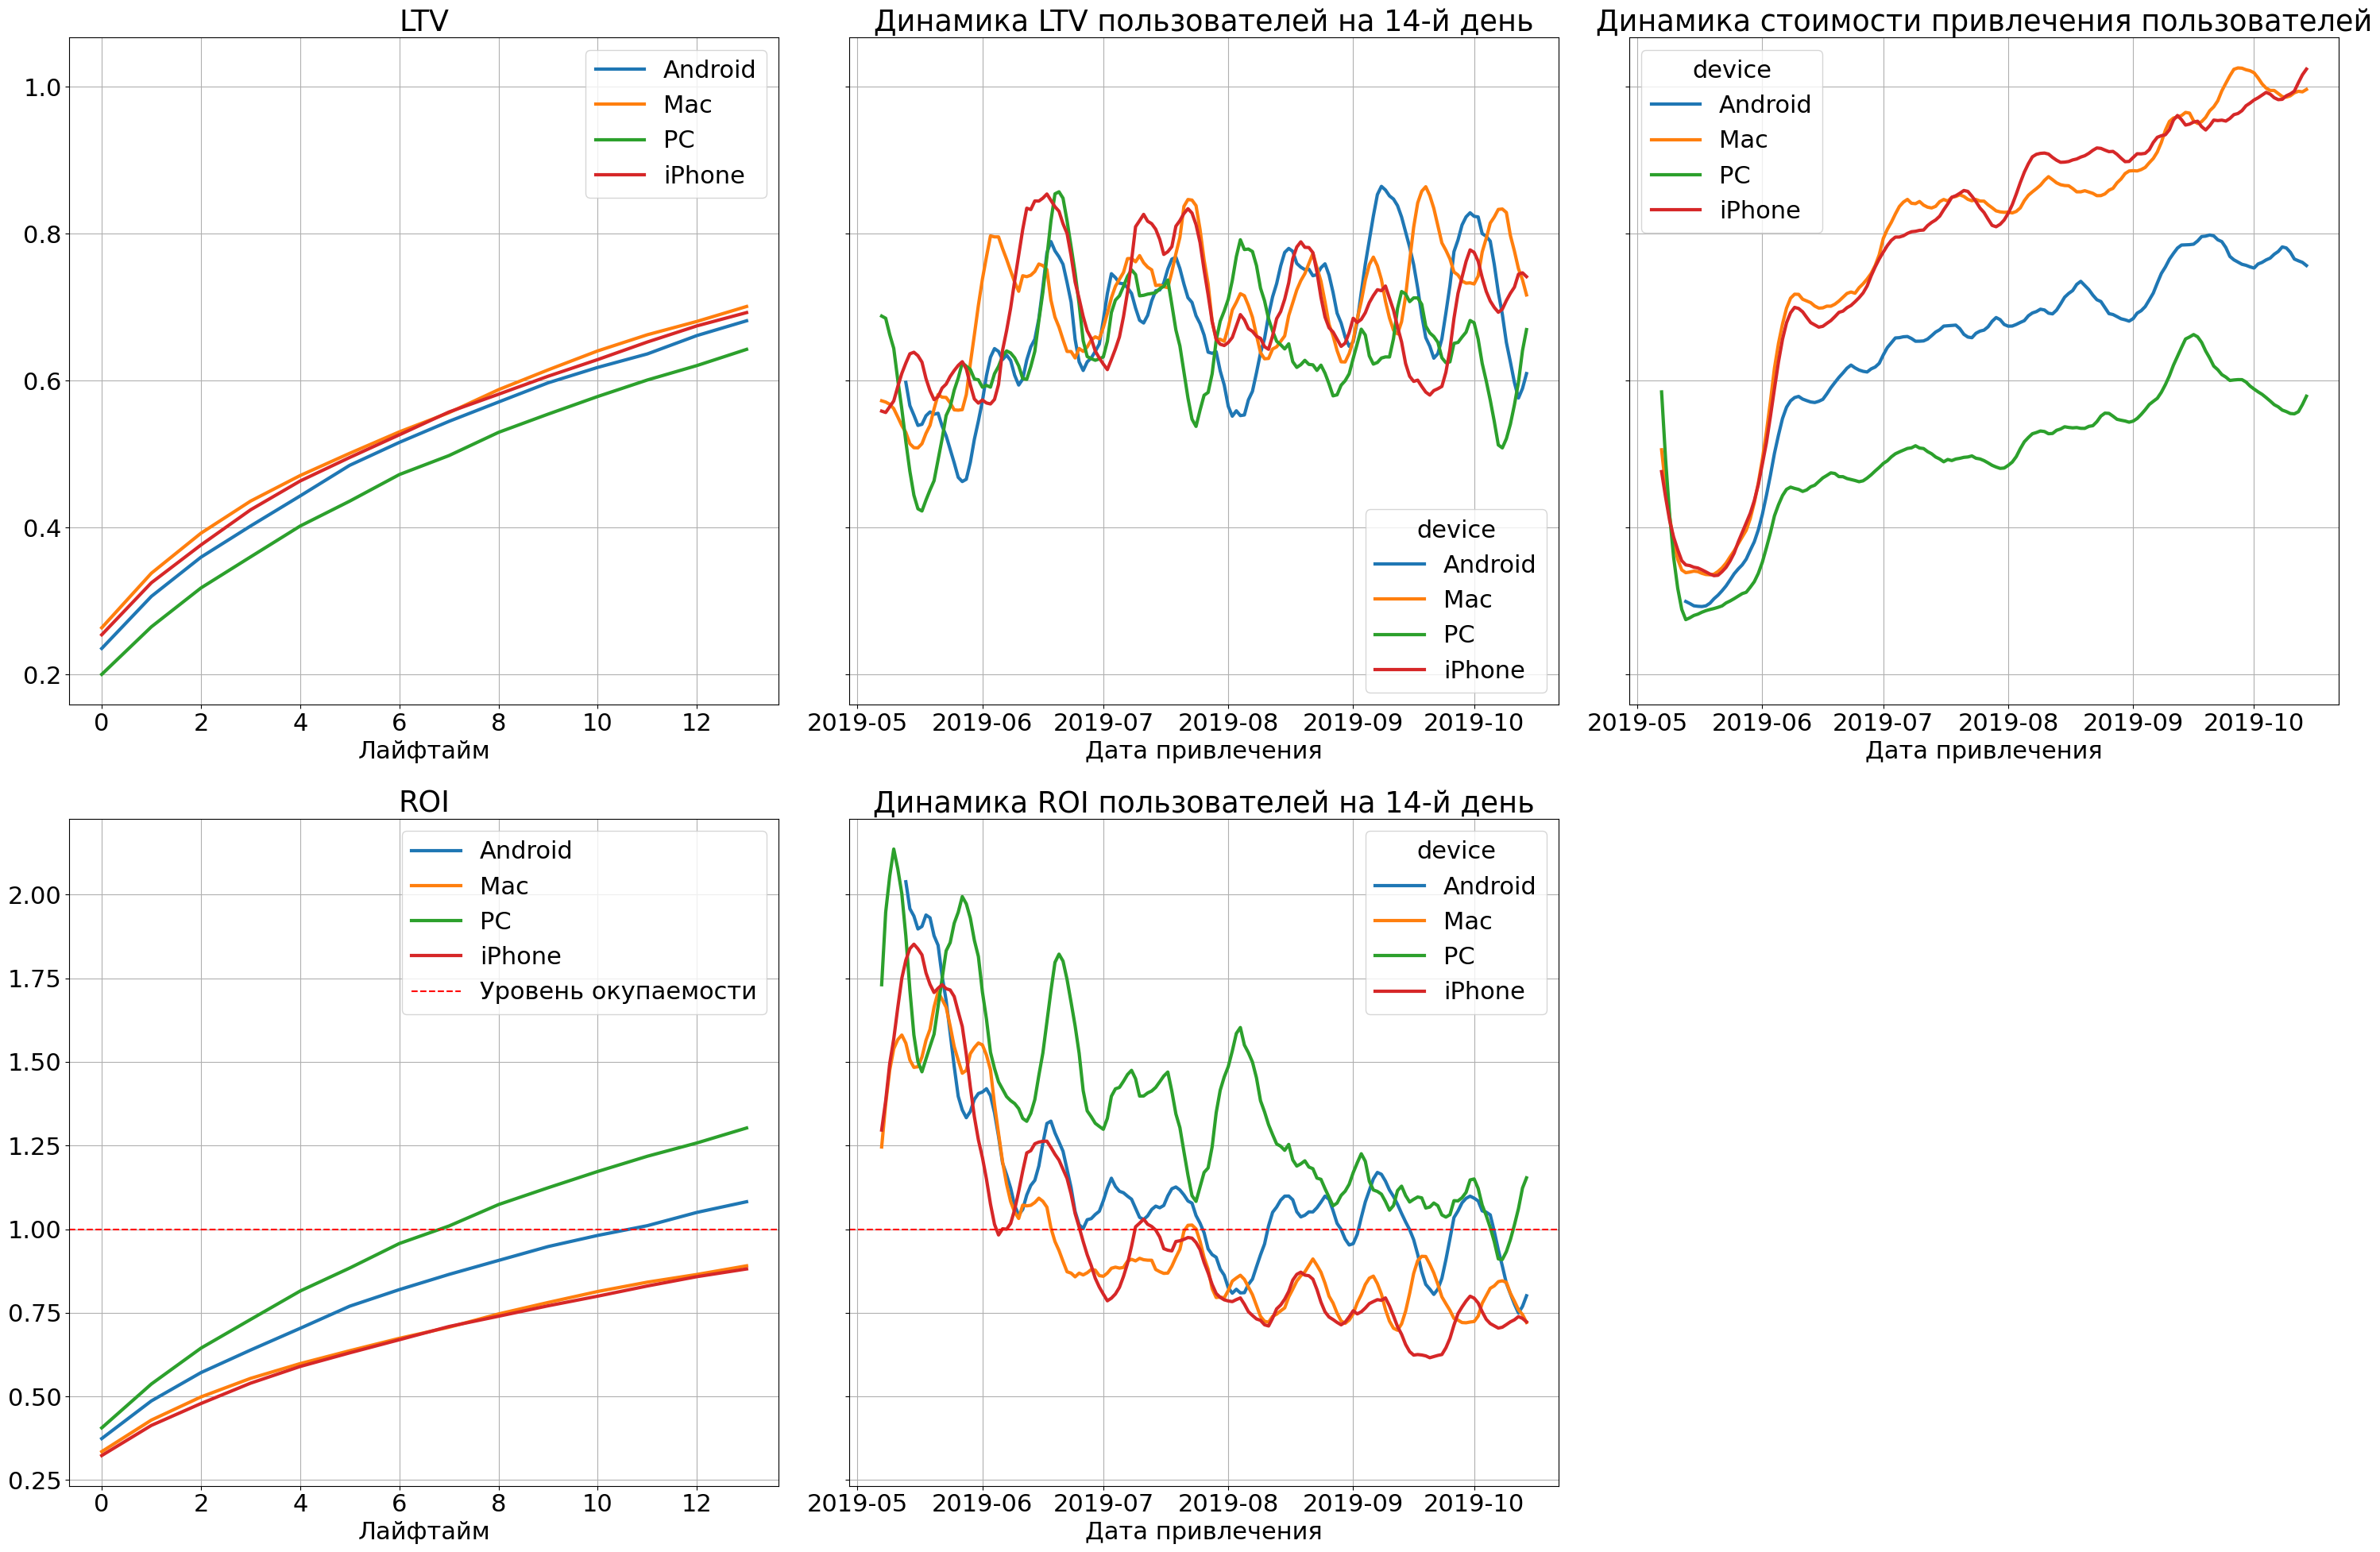

In [ ]:
result_raw,result_grouped, result_in_time,  roi_grouped, roi_in_time= get_ltv(profiles,
                                                                              orders,
                                                                              max_date,
                                                                              horizon_days,
                                                                              dimensions=['device'],
                                                                              ignore_horizon=False)
df1=filter_data(result_in_time,window=7)
df2=filter_data(roi_in_time,window=7)

plt.rcParams['font.size'] = '22'

plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon, window=7)

**Вывод:**

**По LTV пользователи Android, Mac и Iphone показывают близкие значения, а показатели PC отстают от других платформ.
Динамика LTV за весь период в среднем находится на уровне между 0.5 и 0.8 - она немного выросла примерно на 0.1 .
Реклама окупается для пользователей PC в течение 7 дней. У пользователй IPhone в течение 10 дней. Реклама не окупается для пользователей Mac и Android.**

**Стоимость привлечения пользователей PC плавно растет и в сентябре-октябре показывает средние значения 0.65.
Стоимость привлечения пользователей Android также плавно растет и выходит на уровень 0.8.
Наибольшие расходы на рекламу наблюдаются для пользователей Mac и Iphone. Также наблюдается резкий рост в первые месяцы и далее расходы растут до 1 . Расходы на привлечение пользователей Mac и Iphone выше, чем приносимые ими доходы.**


# ---------------------------------------------------------------------------------------------------------------

С окупаемостью проблемы по всем устройствам кроме PC. Это значит, что у нас, по крайней мере, нет технических проблем, влияющих на монетизацию;

####  Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

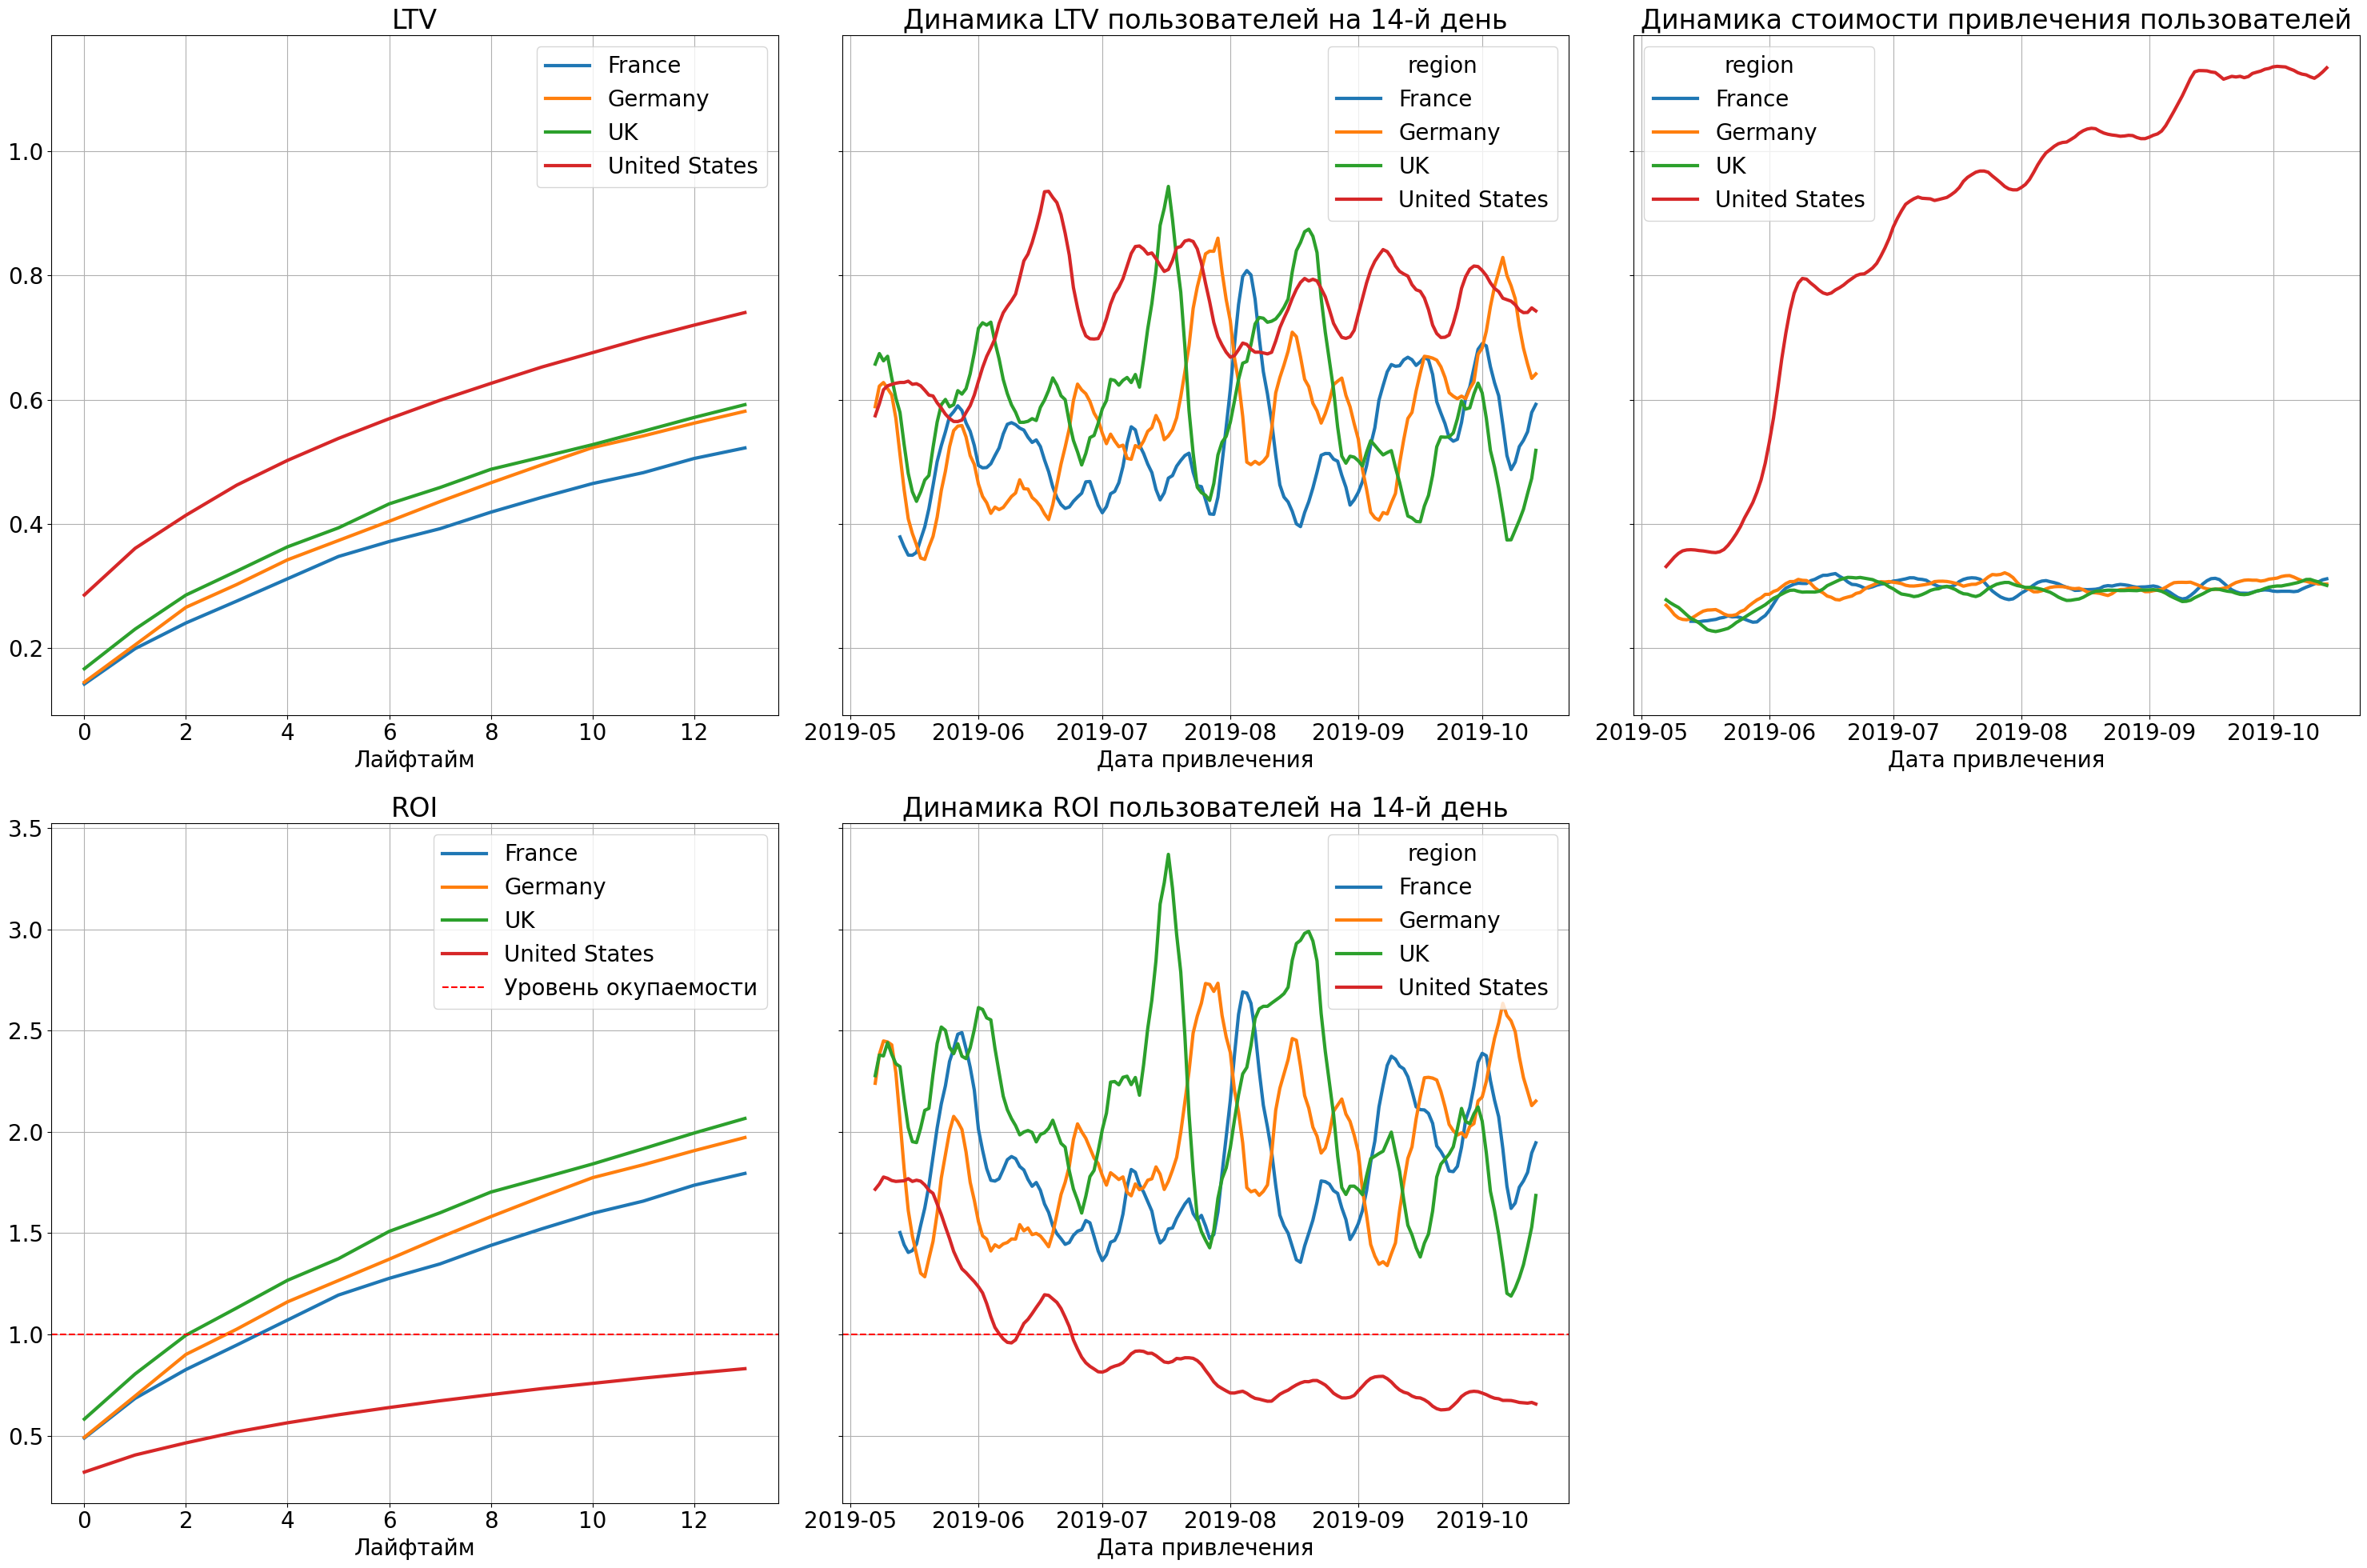

In [ ]:
result_raw,result_grouped_device, result_in_time,  roi_grouped, roi_in_time= get_ltv(profiles,
                                                                              orders,
                                                                              max_date,
                                                                              horizon_days,
                                                                              dimensions=['region'],
                                                                              ignore_horizon=False)
df1=filter_data(result_in_time,window=7)
df2=filter_data(roi_in_time,window=7)

plt.rcParams['font.size'] = '20'

plot_ltv_roi(result_grouped_device, result_in_time, roi_grouped, roi_in_time, horizon, window=7)

In [ ]:
result_grouped_device

cohort_size       0.0       1.0       2.0       3.0       4.0  \
region                                                                         
France               16185  0.142141  0.199196  0.240573  0.275786  0.311736   
Germany              13875  0.145087  0.205225  0.265726  0.302484  0.342267   
UK                   16251  0.166776  0.230663  0.285514  0.324024  0.363157   
United States        92454  0.285541  0.360714  0.413992  0.462489  0.502350   

                    5.0       6.0       7.0       8.0       9.0      10.0  \
region                                                                      
France         0.347566  0.371616  0.392335  0.418919  0.442660  0.464982   
Germany        0.373269  0.404272  0.435993  0.466206  0.495050  0.522886   
UK             0.393618  0.432326  0.458612  0.487918  0.507569  0.527596   
United States  0.537620  0.569447  0.599104  0.626235  0.652490  0.675668   

                   11.0      12.0      13.0  
region                                       
France         0.482556  0.505375  0.522334  
Germany        0.541733  0.562234  0.581368  
UK             0.549280  0.571394  0.592029  
United States  0.698846  0.720051  0.740291

**Вывод:**

**Лидер по LTV - США и на четырнадцатый день LTV равен 0.75 . У Германии, Великобритании и Франции уровень LTV ниже и равен 0.5-0.6. Стоимость же привлечения новых пользователей для США растет огормными темпами, пока у остальных стоимость не растет вовсе.**

**При этом окупается реклама во Франции, Германии и Великобритании. Расходы на рекламу в этих странах постоянны. Расходы на рекламу в США постоянно растут и не окупаются с конца июня.**

# ---------------------------------------------------------------------------------------------------------------

Нужно разбираться детальнее с рекламой в США, тем более, что это наш основной рынок.

#### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [ ]:
result_raw,result_grouped_ltv ,result_in_time,  roi_grouped, roi_in_time= get_ltv(profiles,
                                                                              orders,
                                                                              max_date,
                                                                              horizon_days,
                                                                              dimensions=['channel'],
                                                                              ignore_horizon=False)

result_grouped_ltv_q=result_grouped_ltv
result_grouped_ltv.head()


cohort_size       0.0       1.0       2.0       3.0  \
channel                                                                   
AdNonSense                 3627  0.505842  0.591701  0.646736  0.682506   
FaceBoom                  26736  0.585225  0.660526  0.699576  0.727986   
LeapBob                    7875  0.106979  0.154507  0.203931  0.233968   
MediaTornado               4081  0.139160  0.193208  0.248478  0.296187   
OppleCreativeMedia         7890  0.097778  0.133200  0.174574  0.209995   

                         4.0       5.0       6.0       7.0       8.0  \
channel                                                                
AdNonSense          0.704795  0.731219  0.753231  0.766989  0.789010   
FaceBoom            0.746280  0.759719  0.774128  0.784471  0.791976   
LeapBob             0.258935  0.286817  0.313557  0.333328  0.369470   
MediaTornado        0.335582  0.371044  0.393053  0.422401  0.444416   
OppleCreativeMedia  0.245550  0.270848  0.294882  0.314236  0.333853   

                         9.0      10.0      11.0      12.0      13.0  
channel                                                               
AdNonSense          0.801392  0.804420  0.812674  0.825057  0.836071  
FaceBoom            0.800413  0.805864  0.812023  0.817253  0.821359  
LeapBob             0.393549  0.416996  0.437907  0.456917  0.472758  
MediaTornado        0.465202  0.489659  0.511669  0.530010  0.537594  
OppleCreativeMedia  0.352828  0.370663  0.383439  0.401791  0.416337

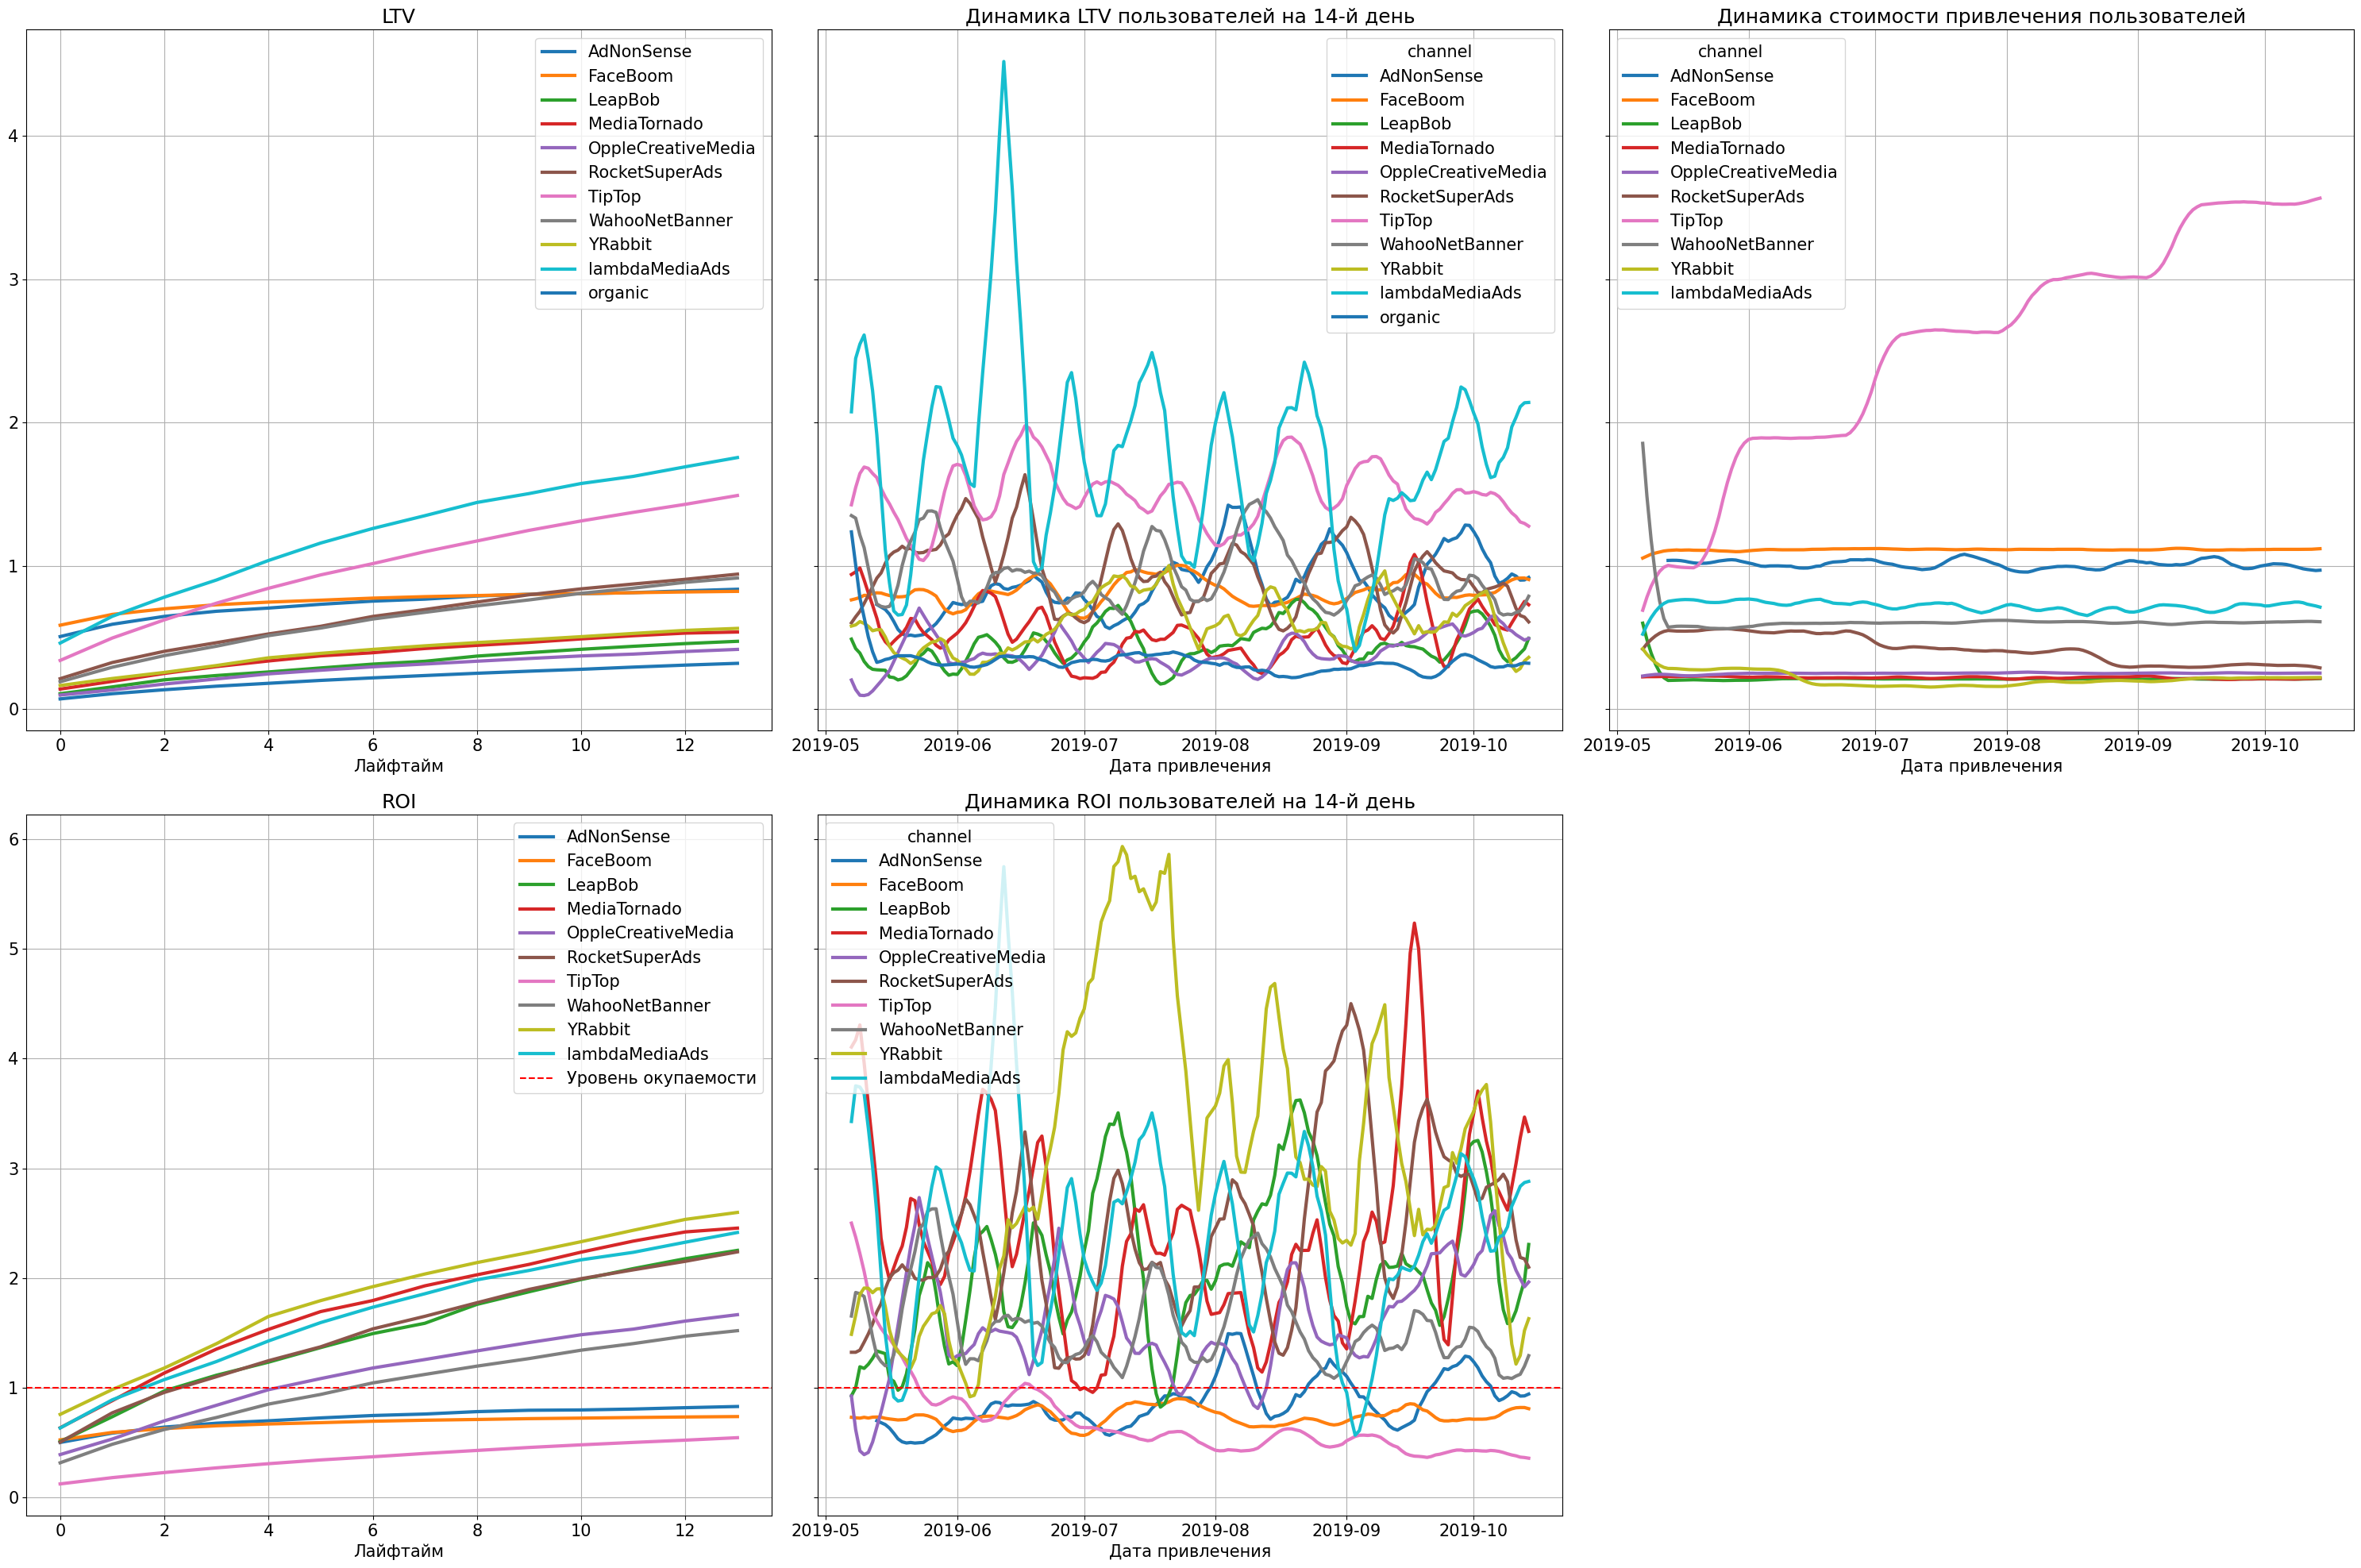

In [ ]:
df1=filter_data(result_in_time,window=7)
df2=filter_data(roi_in_time,window=7)

plt.rcParams['font.size'] = '15'

plot_ltv_roi(result_grouped_ltv_q, result_in_time, roi_grouped, roi_in_time, horizon, window=7)


In [ ]:
result_grouped_ltv=result_grouped_ltv.drop(columns=['cohort_size'])
result_grouped_ltv.head(2)

0.0       1.0       2.0       3.0       4.0       5.0  \
channel                                                                  
AdNonSense  0.505842  0.591701  0.646736  0.682506  0.704795  0.731219   
FaceBoom    0.585225  0.660526  0.699576  0.727986  0.746280  0.759719   

                 6.0       7.0       8.0       9.0      10.0      11.0  \
channel                                                                  
AdNonSense  0.753231  0.766989  0.789010  0.801392  0.804420  0.812674   
FaceBoom    0.774128  0.784471  0.791976  0.800413  0.805864  0.812023   

                12.0      13.0  
channel                         
AdNonSense  0.825057  0.836071  
FaceBoom    0.817253  0.821359

In [ ]:
result_grouped_ltv1=result_grouped_ltv.cumsum(axis=1).reset_index()[['channel',13]]
result_grouped_ltv1[13]=result_grouped_ltv1[13]/14
result_grouped_ltv1.rename(columns = {13:'mean_grouped'}, inplace = True )
display(result_grouped_ltv1.sort_values(by='mean_grouped',ascending=False))

channel  mean_grouped
9       lambdaMediaAds      1.227411
6               TipTop      1.008076
1             FaceBoom      0.756200
0           AdNonSense      0.732260
5       RocketSuperAds      0.639133
7       WahooNetBanner      0.614817
8              YRabbit      0.402349
3         MediaTornado      0.384119
2              LeapBob      0.317116
4   OppleCreativeMedia      0.285712
10             organic      0.215202

In [ ]:
table=roi_grouped.sort_values(by='cac',ascending=False)[['cac',6,13]].reset_index()
table

channel       cac       6.0      13.0
0              TipTop  2.733487  0.371273  0.545250
1            FaceBoom  1.113659  0.695121  0.737531
2          AdNonSense  1.008023  0.747236  0.829417
3      lambdaMediaAds  0.726839  1.733828  2.414941
4      WahooNetBanner  0.601685  1.044277  1.520177
5      RocketSuperAds  0.420648  1.536453  2.238228
6  OppleCreativeMedia  0.249905  1.179977  1.665982
7        MediaTornado  0.219005  1.794721  2.454708
8             YRabbit  0.216684  1.921186  2.597661
9             LeapBob  0.209947  1.493507  2.251801

In [ ]:
table.merge(result_grouped_ltv1,on='channel').rename(columns={6:'roi_7',13:'roi_14','mean_grouped':'mean_ltv','cac':'mean_cac'}).sort_values(by='roi_14',ascending=False)

channel  mean_cac     roi_7    roi_14  mean_ltv
8             YRabbit  0.216684  1.921186  2.597661  0.402349
7        MediaTornado  0.219005  1.794721  2.454708  0.384119
3      lambdaMediaAds  0.726839  1.733828  2.414941  1.227411
9             LeapBob  0.209947  1.493507  2.251801  0.317116
5      RocketSuperAds  0.420648  1.536453  2.238228  0.639133
6  OppleCreativeMedia  0.249905  1.179977  1.665982  0.285712
4      WahooNetBanner  0.601685  1.044277  1.520177  0.614817
2          AdNonSense  1.008023  0.747236  0.829417  0.732260
1            FaceBoom  1.113659  0.695121  0.737531  0.756200
0              TipTop  2.733487  0.371273  0.545250  1.008076

**Вывод:**

**Лидерами по LTV являются lambdaMediaAds и TipTop. Показатель LTV на 14й день lambdaMediaAds преимущественно всегда превышает CAC, кроме локального падения в сентябре. TipTop не окупается практически на всем отрезке времени из-за высокой стоимости размещения рекламы. Доход от TipTop почти в 3 раза меньше расходов на рекламу.
Среди не окупаемых каналов рекламы находятся TipTop, FaceBoom и AdNonSense. FaceBoom и AdNonSense не окупаются из-за низкого LTV пользователей. Все остальные каналу окупаются**

# ---------------------------------------------------------------------------------------------------------------

#### Ответьте на такие вопросы:
* **Окупается ли реклама, направленная на привлечение пользователей в целом?**

**По результатам анализа окупаемости рекламы можно сделать вывод, что в целом реклама не окупается. Согласно графику в 5.1 - в таблице с ROI - график за 14 дней так и не пересек прямую САС (немного не хватило).**

* **Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?**

**Наиболее убыточный рынок в США. Это связано с низким удержанием клиентов, привлеченных FaceBoom, и высокой стоимостью рекламы в TipTop, которая не окупается привлеченными пользователями. В других же регионах AdNonSense показал плохой результата по удержанию.**


* **Чем могут быть вызваны проблемы окупаемости?**

**Вышеописанные проблемные рекламные каналы по сути дают некачественных клиентов, они переходят и даже покупают что-то но вот удержать их не удается. Так же играет роль динамика цены на рекламу - как у TipTop, логично было бы сокращать закупку рекламы у сервиса цены которой растут много выше рынка. На рынке же США возможно рынок данных услуг уже тесно занят, и по сути не имея репутации и за не имением времени на окупаемость, а также рекламы стоимость которой выше чем в других регионах - спокойно можно прогореть и уйти в минус**

# ---------------------------------------------------------------------------------------------------------------

#### ВЫВОД ПО ГЛАВЕ 5:
**С учетом органических пользователей (то есть всех пользователей) LTV растет c 0.58 до 0.7, а затраты на привлечение пользователей растут с 0.33 до 0.87. БЕЗ учета органических пользователей дела еще хуже LTV не растет или растет слабо на всем промежутке и держится в районе 0.9, а затраты на привлечение пользователей растут с 0.75 до 1.3. Ситуация не сильно отличается в двух случаях. Доходы не поспевают за расходами в общем - и что хуже всего - тренд негативный. То есть вначале реклама окупается, но уже к середине июля она перестает это делать.
Конверсия у привлеченных пользователей лучше, чем у органических. В США высокая конверсия пользователей. У пользователей из других регионов примерно одинаковая конверсия за полгода. Лучше всего конвертируется клиенты с с Mac и IPhone, похуже пользователи Android и совсем плохо юзеры ПК. По уровню конверсии самые качественные каналы: FaceBoom, AdNonSense, lambdaMediaAds, TipTop. Наименьшая конверсия от каналов: LeapBob, OppleCreativeMedia, organic (органический трафик).
Интересная особенность: удержание органических пользователей выше чем привлеченных со стороны. Есть проблемы с удержанием платящих пользователей из США, оно ниже всех остальных.  В США выделяются FaceBom, которая работает только там - удержание у них ниже чем у других на порядок. Он то и снижает результаты в США.
Очень некачественные пользователи из трафика AdNonSense - данный источник не работает в США поэтому, он не может быть причиной сниженных результатов удержания там.
По LTV пользователи Android, Mac и Iphone показывают близкие значения, а показатели PC отстают от других платформ. Динамика LTV за весь период в среднем находится на уровне между 0.5 и 0.8 - она немного выросла примерно на 0.1 . Реклама окупается для пользователей PC в течение 7 дней. У пользователй IPhone в течение 10 дней. Реклама не окупается для пользователей Mac и Android.
Лидер по LTV - США и на четырнадцатый день LTV равен 0.75 . У Германии, Великобритании и Франции уровень LTV ниже и равен 0.5-0.6. При этом окупается реклама во Франции, Германии и Великобритании. Расходы на рекламу в этих странах постоянны. Расходы на рекламу в США постоянно растут и не окупаются с конца июня.
Лидерами LTV по каналам являются lambdaMediaAds и TipTop. Показатель LTV на 14й день lambdaMediaAds преимущественно всегда превышает CAC, кроме локального падения в сентябре. TipTop не окупается практически на всем отрезке времени из-за высокой стоимости размещения рекламы. Доход от TipTop почти в 3 раза меньше расходов на рекламу. Среди не окупаемых каналов рекламы находятся TipTop. А FaceBoom и AdNonSense не окупаются из-за низкого LTV пользователей. Все остальные каналу окупаются.
По результатам анализа окупаемости рекламы можно сделать вывод, что в целом реклама не окупается.
Наиболее убыточный рынок в США. Это связано с низким удержанием клиентов, привлеченных FaceBoom, и высокой стоимостью рекламы в TipTop, которая не окупается привлеченными пользователями. В других же регионах AdNonSense показал плохой результата по удержанию.
Вышеописанные проблемные рекламные каналы по сути дают некачественных клиентов, они переходят и даже покупают что-то, но вот удержать их не удается. Так же играет роль динамика цены на рекламу - как у TipTop, логично было бы сокращать закупку рекламы у сервиса цены которой растут много выше рынка. На рынке же США возможно рынок похожих услуг уже тесно занят, и по сути, не имея репутации и за не имением времени на окупаемость, а также рекламы стоимость которой выше чем в других регионах - спокойно можно прогореть и уйти в минус.**

# ===============================================================

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

В данном расчете приведены результаты анализа рентабельности рекламной компании приложения Procrastinate Pro+.

После подключения все необходимых библиотек было выгружены все данные и даны названия visits – визиты, orders - заказы, costs – заказы. Далее было исправлено названия колонок, написанных не по стилю. При проверке не было обнаружено ни дубликатов, ни пропусков. Были заменены типы данных таблиц.


Исследуемый период привлечения клиентов: с 1 мая 2019 по 27 октября 2019 года. Анализ проведен в конце октября 2019 года, горизонт анализа составляет 14 дней.
Были проанализированы характеристики клиентов для компании. Выявлены откуда они, какими устройствами пользуются и благодоря какому источнику привлекаются. Оказалось, что из США, Франции, Германии и Великобритании – в США больше всего платящих клиентов - почти 78%. Так же из США самые качественные клиенты - 7 процентов пользователей из США являются платящими. Из 4 устройств, что используют юзеры: Mac, iPhone, PС и Android - у 6.4% пользователей Mac являются платящими – и это самый большой процент из устройств. Распределение же платящих пользователей по платформам более разнообразное, но почти 60% рынка занимают пользователи продукции компании Apple. Платящих пользователей же мобильных устройств около 61%. Безусловным лидером по заданным параметрам является IPhone он в одиночку занимает около 40% рынка- так что ориентироваться лучше на его пользователей. Трафик идет из 11 источников. 12.2 % пользователей источника FaceBoom являются платящими – и это самый большой процент. Платящих у других источников: lambdaMediaAds– 10.5%, у AdNonSense– 11.3 %, у TipTop чуть меньше 10 %. Распределение же платящих пользователей по источникам такое: 40% приходится на FaceBoom, у TipTop 21%, 13% являются органическими пользователями – то есть сами нашли наш сервис.  Общая сумма расходов на маркетинг составила 105 497. Из всех расходов на маркетинг 30% пришлось на FaceBoom - это 32 445, 51% - на TipTop - это 54 751, остальные траты не заняли и 5%. Больше всего трат приходится на источники - TipTop и FaceBoom. С учетом органического трафика в среднем привлечение одного клиента стоит- 0.703. А БЕЗ учета органического трафика в среднем привлечение одного клиента стоит- 1.127. У FaceBoom и TipTop стоимость привлечение выше средней, у TipTop самая высокая стоимость привлечения на 1 клиента 2.8 – это очень много.

С учетом органических пользователей LTV растет медленнее чем САС. БЕЗ учета органических пользователей дела еще хуже LTV не растет или растет слабо на всем промежутке, а затраты на привлечение пользователей растут с 0.75 до 1.3, что является негативным трендом. Вначале реклама окупается, но уже к середине июля она перестает это делать. Конверсия у привлеченных пользователей оказалась лучше, чем у органических. В США конверсия выше остальных стран в 2 раза. Лучше всего конвертируется клиенты с с Mac и IPhone, хуже пользователи Android и совсем плохо юзеры ПК. По уровню конверсии самые качественные каналы: FaceBoom, AdNonSense, lambdaMediaAds, TipTop. Наименьшая конверсия от каналов: LeapBob, OppleCreativeMedia, organic. Интересная особенность: удержание органических пользователей выше чем привлеченных со стороны. Очень некачественные пользователи из трафика AdNonSense - данный источник не работает в США. Есть проблемы с удержанием платящих пользователей из США, оно ниже всех остальных. В США выделяются FaceBom, которая работает только там - удержание у них ниже чем у других на порядок. Он то и снижает результаты в США. По LTV PC отстает от других платформ. Динамика LTV за весь период немного выросла (на 0.1). Реклама окупается для пользователей PC в течение 7 дней, IPhone в течение 10 дней. Но не окупается для пользователей Mac и Android. Лидер по LTV - США и на четырнадцатый день LTV равен 0.75. При этом окупается реклама во Франции, Германии и Великобритании. Лидерами LTV по каналам являются lambdaMediaAds и TipTop. Показатель LTV на 14й день lambdaMediaAds преимущественно всегда превышает CAC, кроме локального падения в сентябре.

По результатам анализа окупаемости рекламы можно сделать вывод, что в целом реклама не окупается. Наиболее убыточный рынок в США, где расходы постоянно растут и не окупаются с конца июня. Это связано с низким удержанием клиентов, привлеченных FaceBoom, и высокой стоимостью рекламы в TipTop, которая не окупается привлеченными пользователями. В других же регионах AdNonSense показал плохой результата по удержанию. Все остальные каналы окупаются.  Вышеописанные проблемные рекламные каналы по сути дают некачественных клиентов, они переходят и даже покупают что-то, но вот удержать их не удается. Так же играет роль динамика цены на рекламу - как у TipTop, логично было бы сокращать закупку рекламы у сервиса цены которой растут много выше рынка. На рынке же США возможно рынок похожих услуг уже тесно занят, и по сути, не имея репутации и за неимением времени на окупаемость, а также рекламы стоимость, которой выше чем в других регионах - спокойно можно прогореть и уйти в минус.


**Для повышения рентабельности необходимо:**

* рассмотреть возможность снижения затрат на рекламу в TipTop, если снизить расходы не удастся, то придется отказаться от размещения рекламы на данной платформе.
* выяснить причины низкого удержания пользователей, приходящих с FaceBoom и AdNonSense. Это точно не связано с устройствами и платформами клиентов. Если не удасться вы
* высокую рентабельность показала реклама lambdaMediaAds. Данный источник имеет высокие показатели конверсии и удержания клиентов. Стоит обратить внимание на этот источник рекламы как наиболее перспективный.
